# Capital Bike Sharing Analysis & Prediction

# ***Optimasi Operasional Bike Sharing: Memprediksi Jumlah Pengguna Berdasarkan Kondisi Cuaca dan Waktu***

# A. PROBLEM STATEMENT

<div class="alert alert-info">

**Latar Belakang**

Optimasi Operasional Bike Sharing: Memprediksi Jumlah Pengguna Berdasarkan Kondisi Cuaca dan Waktu
Latar Belakang
Sistem bike sharing telah menjadi solusi transportasi yang populer di banyak kota di seluruh dunia karena kemudahan akses, ramah lingkungan, dan mendukung gaya hidup sehat. Sistem ini memungkinkan pengguna untuk menyewa sepeda dari satu lokasi dan mengembalikannya di lokasi lain secara otomatis, sehingga memberikan fleksibilitas dalam mobilitas perkotaan. Data yang dihasilkan dari sistem bike sharing, seperti waktu penyewaan, jumlah pengguna, dan kondisi lingkungan, memberikan wawasan berharga untuk memahami pola mobilitas masyarakat.
Faktor seperti kondisi cuaca (suhu, kelembapan, dan situasi cuaca) serta waktu (jam, hari, musim, atau hari libur) memiliki pengaruh signifikan terhadap jumlah pengguna bike sharing. Misalnya, cuaca cerah cenderung meningkatkan jumlah penyewaan sepeda, sementara hujan atau salju dapat menurunkannya. Demikian pula, waktu tertentu seperti jam sibuk atau hari kerja dapat memengaruhi permintaan. Oleh karena itu, memahami hubungan antara faktor-faktor ini dan jumlah pengguna dapat membantu operator bike sharing mengoptimalkan distribusi sepeda, menentukan lokasi stasiun yang strategis, serta mengelola inventaris sepeda secara efisien.
Penelitian ini bertujuan untuk memanfaatkan data bike sharing untuk membangun model prediksi jumlah pengguna berdasarkan kondisi cuaca dan waktu. Dengan model ini, operator dapat merencanakan operasional secara lebih efektif, seperti menyesuaikan jumlah sepeda yang tersedia di stasiun tertentu atau mengantisipasi lonjakan permintaan pada waktu-waktu tertentu. Pendekatan ini juga dapat mendukung keberlanjutan sistem bike sharing dengan meminimalkan biaya operasional dan meningkatkan kepuasan pengguna.




<div class="alert alert-info">

**Rumusan Masalah**

Berdasarkan latar belakang di atas, rumusan masalah penelitian ini adalah sebagai berikut:

Faktor cuaca (suhu, kelembapan, situasi cuaca) dan waktu (jam, musim, hari libur) mana yang memiliki pengaruh signifikan terhadap jumlah pengguna bike sharing?
Bagaimana cara membangun model prediksi yang akurat untuk memperkirakan jumlah pengguna bike sharing berdasarkan kondisi cuaca dan waktu?
Bagaimana hasil prediksi dapat digunakan untuk mengoptimalkan operasional sistem bike sharing, seperti distribusi sepeda dan pengelolaan stasiun?

<div class="alert alert-info">

**Tujuan Penelitian**

Penelitian ini memiliki tujuan sebagai berikut:

Mengidentifikasi faktor cuaca dan waktu yang secara signifikan memengaruhi jumlah pengguna bike sharing.
Mengembangkan model prediksi berbasis data untuk memperkirakan jumlah pengguna bike sharing berdasarkan kondisi cuaca dan waktu.
Memberikan rekomendasi strategi operasional bagi operator bike sharing untuk meningkatkan efisiensi distribusi sepeda, pengelolaan stasiun, dan kepuasan pengguna berdasarkan hasil prediksi.

## 3. Objective

<div class="alert alert-info">

**Kepada Siapa Hasil Analisis Ditujukan**

Hasil analisis ini ditujukan kepada berbagai pemangku kepentingan dalam ekosistem bisnis berbagi sepeda, dengan fokus pada mereka yang dapat memanfaatkan wawasan untuk pengambilan keputusan strategis dan operasional. Audiens utama meliputi:

1. **Operator Sistem Berbagi Sepeda**:
   - **Deskripsi**: Perusahaan atau organisasi yang mengelola layanan berbagi sepeda, seperti Citi Bike, Mobike, atau penyedia lokal di kota tertentu.
   - **Kebutuhan**:
     - Prediksi permintaan untuk mengelola distribusi sepeda di stasiun.
     - Rekomendasi waktu pemeliharaan untuk meminimalkan gangguan layanan.
     - Wawasan tentang pola penyewaan untuk meningkatkan efisiensi operasional.

3. **Pemerintah Kota atau Perencana Transportasi**:
   - **Deskripsi**: Otoritas kota atau badan transportasi yang mendukung atau mengatur sistem berbagi sepeda sebagai bagian dari mobilitas urban.
   - **Kebutuhan**:
     - Data untuk mendukung kebijakan transportasi ramah lingkungan.
     - Wawasan tentang pola penggunaan sepeda untuk merencanakan infrastruktur (misalnya, jalur sepeda atau stasiun baru).

# B. Pemahaman Data

<div class="alert alert-info">
Dataset ini berisi informasi historis peminjaman sepeda secara lengkap yang terdiri dari 12.165 baris data dan 11 kolom utama sebagai berikut:

| Nama Kolom | Penjelasan
|----|----|
| `dteday` | tanggal peminjaman
| `season` | musim (1: musim dingin, 2: musim semi, 3: musim panas, 4: musim gugur)
| `hr` | jam (0 hingga 23)
| `holiday` | hari libur (1) atau tidak (0)
| `temp` | suhu yang dinormalisasi dalam Celcius dalam skala jam
| `atemp` | suhu perasaan yang dinormalisasi dalam Celcius
| `hum` | kelembaban yang dinormalisasi
| `casual` | jumlah pengguna biasa
| `registered` | jumlah pengguna terdaftar (member)
| `cnt` | jumlah total sepeda yang disewa termasuk yang casual dan yang terdaftar
| `weathersit` | cuaca:  
| | 1: cerah, sedikit berawan
| |2: kabut + mendung, kabut + awan pecah + kabut + sedikit awan
| |3: salju ringan, hujan ringan + badai petir
| |4: hujan lebat + hujan es + badai petir + kabur, salju + kabut

In [3]:
%%capture
!pip install jcopml
!pip install category_encoders
!pip install imblearn
!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install missingno

## Libraries

In [4]:
# Data Manipulation
import pandas as pd
import numpy as np
import missingno as msno

# Visualization & Map
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample

# Modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, IsolationForest
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

## Data Load

In [5]:
df = pd.read_csv("data_bike_sharing.csv")
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


## Features Description

<div class="alert alert-info">

**Features**

- `dteday`: date
- `season`: season (1: winter, 2: spring, 3: summer, 4: fall)
- `hr`: hour (0 to 23)
- `holiday`: holiday or not
- `temp`: normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
- `hum`: normalized humidity. The values are divided into 100 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered
- `weathersit`:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


# Data Understanding

In [6]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


In [7]:
## Data Summary
df.describe()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2012-01-01 02:04:45.869297408,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
min,2011-01-01 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 00:00:00,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,2012-07-03 00:00:00,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,2012-12-31 00:00:00,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000
std,NaN,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903


## Data Numerik

In [8]:
# mengambil data numerik
numerik = df.select_dtypes(include='number') # yg mengandung integer dan float akan masuk, kecuali kolom holiday, season, dan weathersit karena merupakan kategorik
numerik

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [9]:
numerik.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


## Duplicate Check

In [10]:
# Detecting Duplicate
df.duplicated().sum()

0

Tidak ada Duplicate data dari dataset.

In [11]:
# Mendapatkan daftar semua kolom
all_columns = df.columns.tolist()

# Hapus kolom dteday dari daftar kolom
subset_columns = all_columns.copy()
subset_columns.remove('dteday')

# Temukan baris yang duplikat berdasarkan kolom yang tersisa (tanpa kolom dteday)
duplicate_rows = df[df.duplicated(subset=subset_columns, keep=False)]
display(duplicate_rows.sort_values(by='hum'))
display(f'Total duplicate: {duplicate_rows.shape[0]} baris')

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
5050,2012-02-29,0.56,1,0,1,0.2879,0.30,2,0,4,4
3564,2012-03-07,0.56,1,0,1,0.2879,0.30,2,0,4,4
6350,2012-02-07,0.61,1,0,1,0.3333,0.30,2,0,4,4
5433,2012-02-15,0.61,1,0,1,0.3333,0.30,2,0,4,4
1924,2011-03-08,0.64,1,0,1,0.2727,0.22,4,0,2,2
3082,2012-02-21,0.64,1,0,1,0.2727,0.22,4,0,2,2
7731,2011-12-10,0.65,1,0,4,0.2576,0.24,6,1,10,11
1776,2011-12-03,0.65,1,0,4,0.2576,0.24,6,1,10,11
5401,2011-07-11,0.74,1,0,3,0.6212,0.66,4,0,4,4
971,2012-07-26,0.74,1,0,3,0.6212,0.66,4,0,4,4


'Total duplicate: 22 baris'

## Missing Value Handling

In [12]:
 #Jumlah data kosong (NaN) untuk setiap variable
missing = pd.DataFrame({'jumlah':df.isnull().sum().sort_values(ascending = False)})
total_baris_data = len(df)
missing['persentase %'] = round((missing['jumlah']/total_baris_data)*100,2)
missing

,jumlah,persentase %
dteday,0,0.0
hum,0,0.0
weathersit,0,0.0
holiday,0,0.0
season,0,0.0
atemp,0,0.0
temp,0,0.0
hr,0,0.0
casual,0,0.0
registered,0,0.0


Tidak ada Missing data dari dataset.

<Axes: >

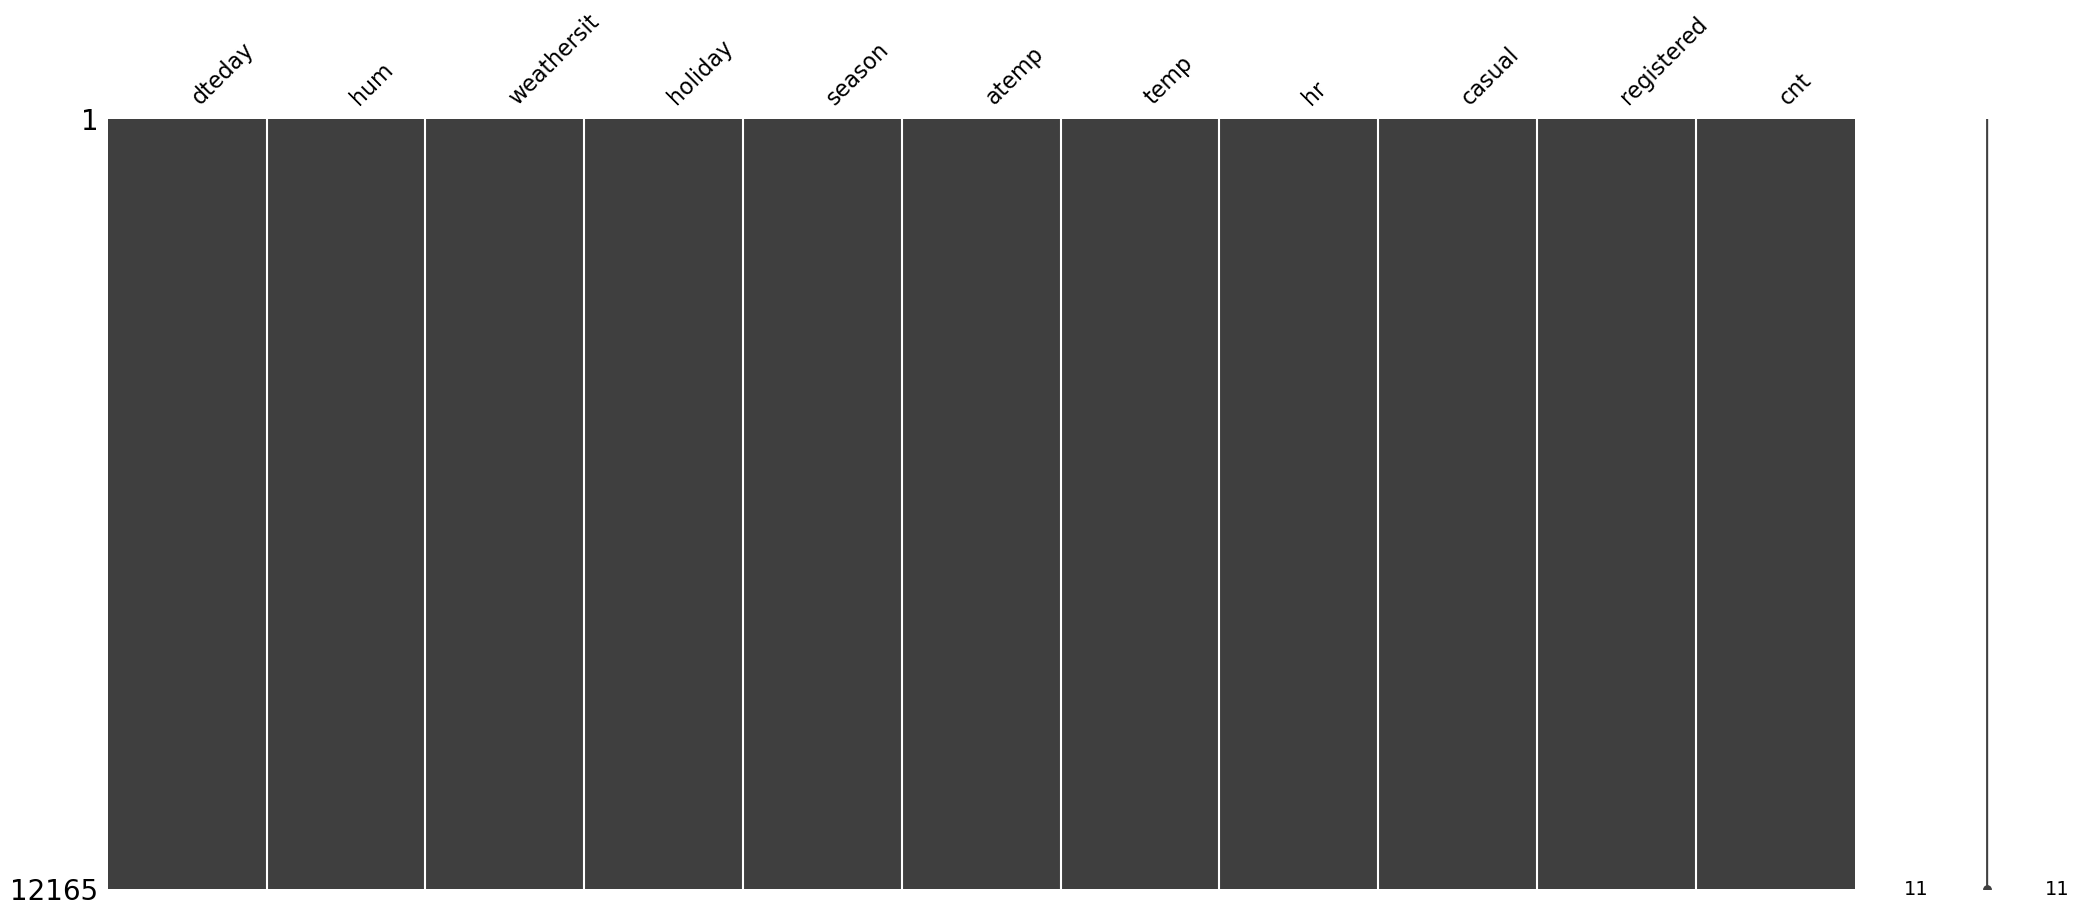

In [13]:
msno.matrix(df)

## Outliers

<div class="alert alert-info">
Outliers merupakan nilai dalam dataset yang jauh berbeda atau menyimpang secara signifikan dari sebagian besar data lainnya. Dalam istilah statistik, outliers sering dianggap sebagai pengamatan "ekstrem" yang tidak mengikuti pola umum distribusi data. Pengecekan data outliers berfungsi untuk mengidentifikasi nilai ekstrem yang berpotensi mempengaruhi analisis data secara signifikan. Metode yang digunakan untuk mendeteksi outliers adalah IQR (Interquartile Range) karena data terdistribusi tidak normal, lalu divisualisasikan dengan boxplot.

In [14]:
for nama_kolom in numerik.columns:
    q3 = df[nama_kolom].quantile(0.75)
    q1 = df[nama_kolom].quantile(0.25)
    iqr = q3 - q1
    batas_atas = q3 + (iqr * 1.5)
    batas_bawah = q1 - (iqr * 1.5)
    jumlah_outliers = len(df[(df[nama_kolom] > batas_atas) | (df[nama_kolom] < batas_bawah)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')

Jumlah Outliers hum: 14
Jumlah Outliers weathersit: 3
Jumlah Outliers holiday: 362
Jumlah Outliers season: 0
Jumlah Outliers atemp: 0
Jumlah Outliers temp: 0
Jumlah Outliers hr: 0
Jumlah Outliers casual: 847
Jumlah Outliers registered: 470
Jumlah Outliers cnt: 338


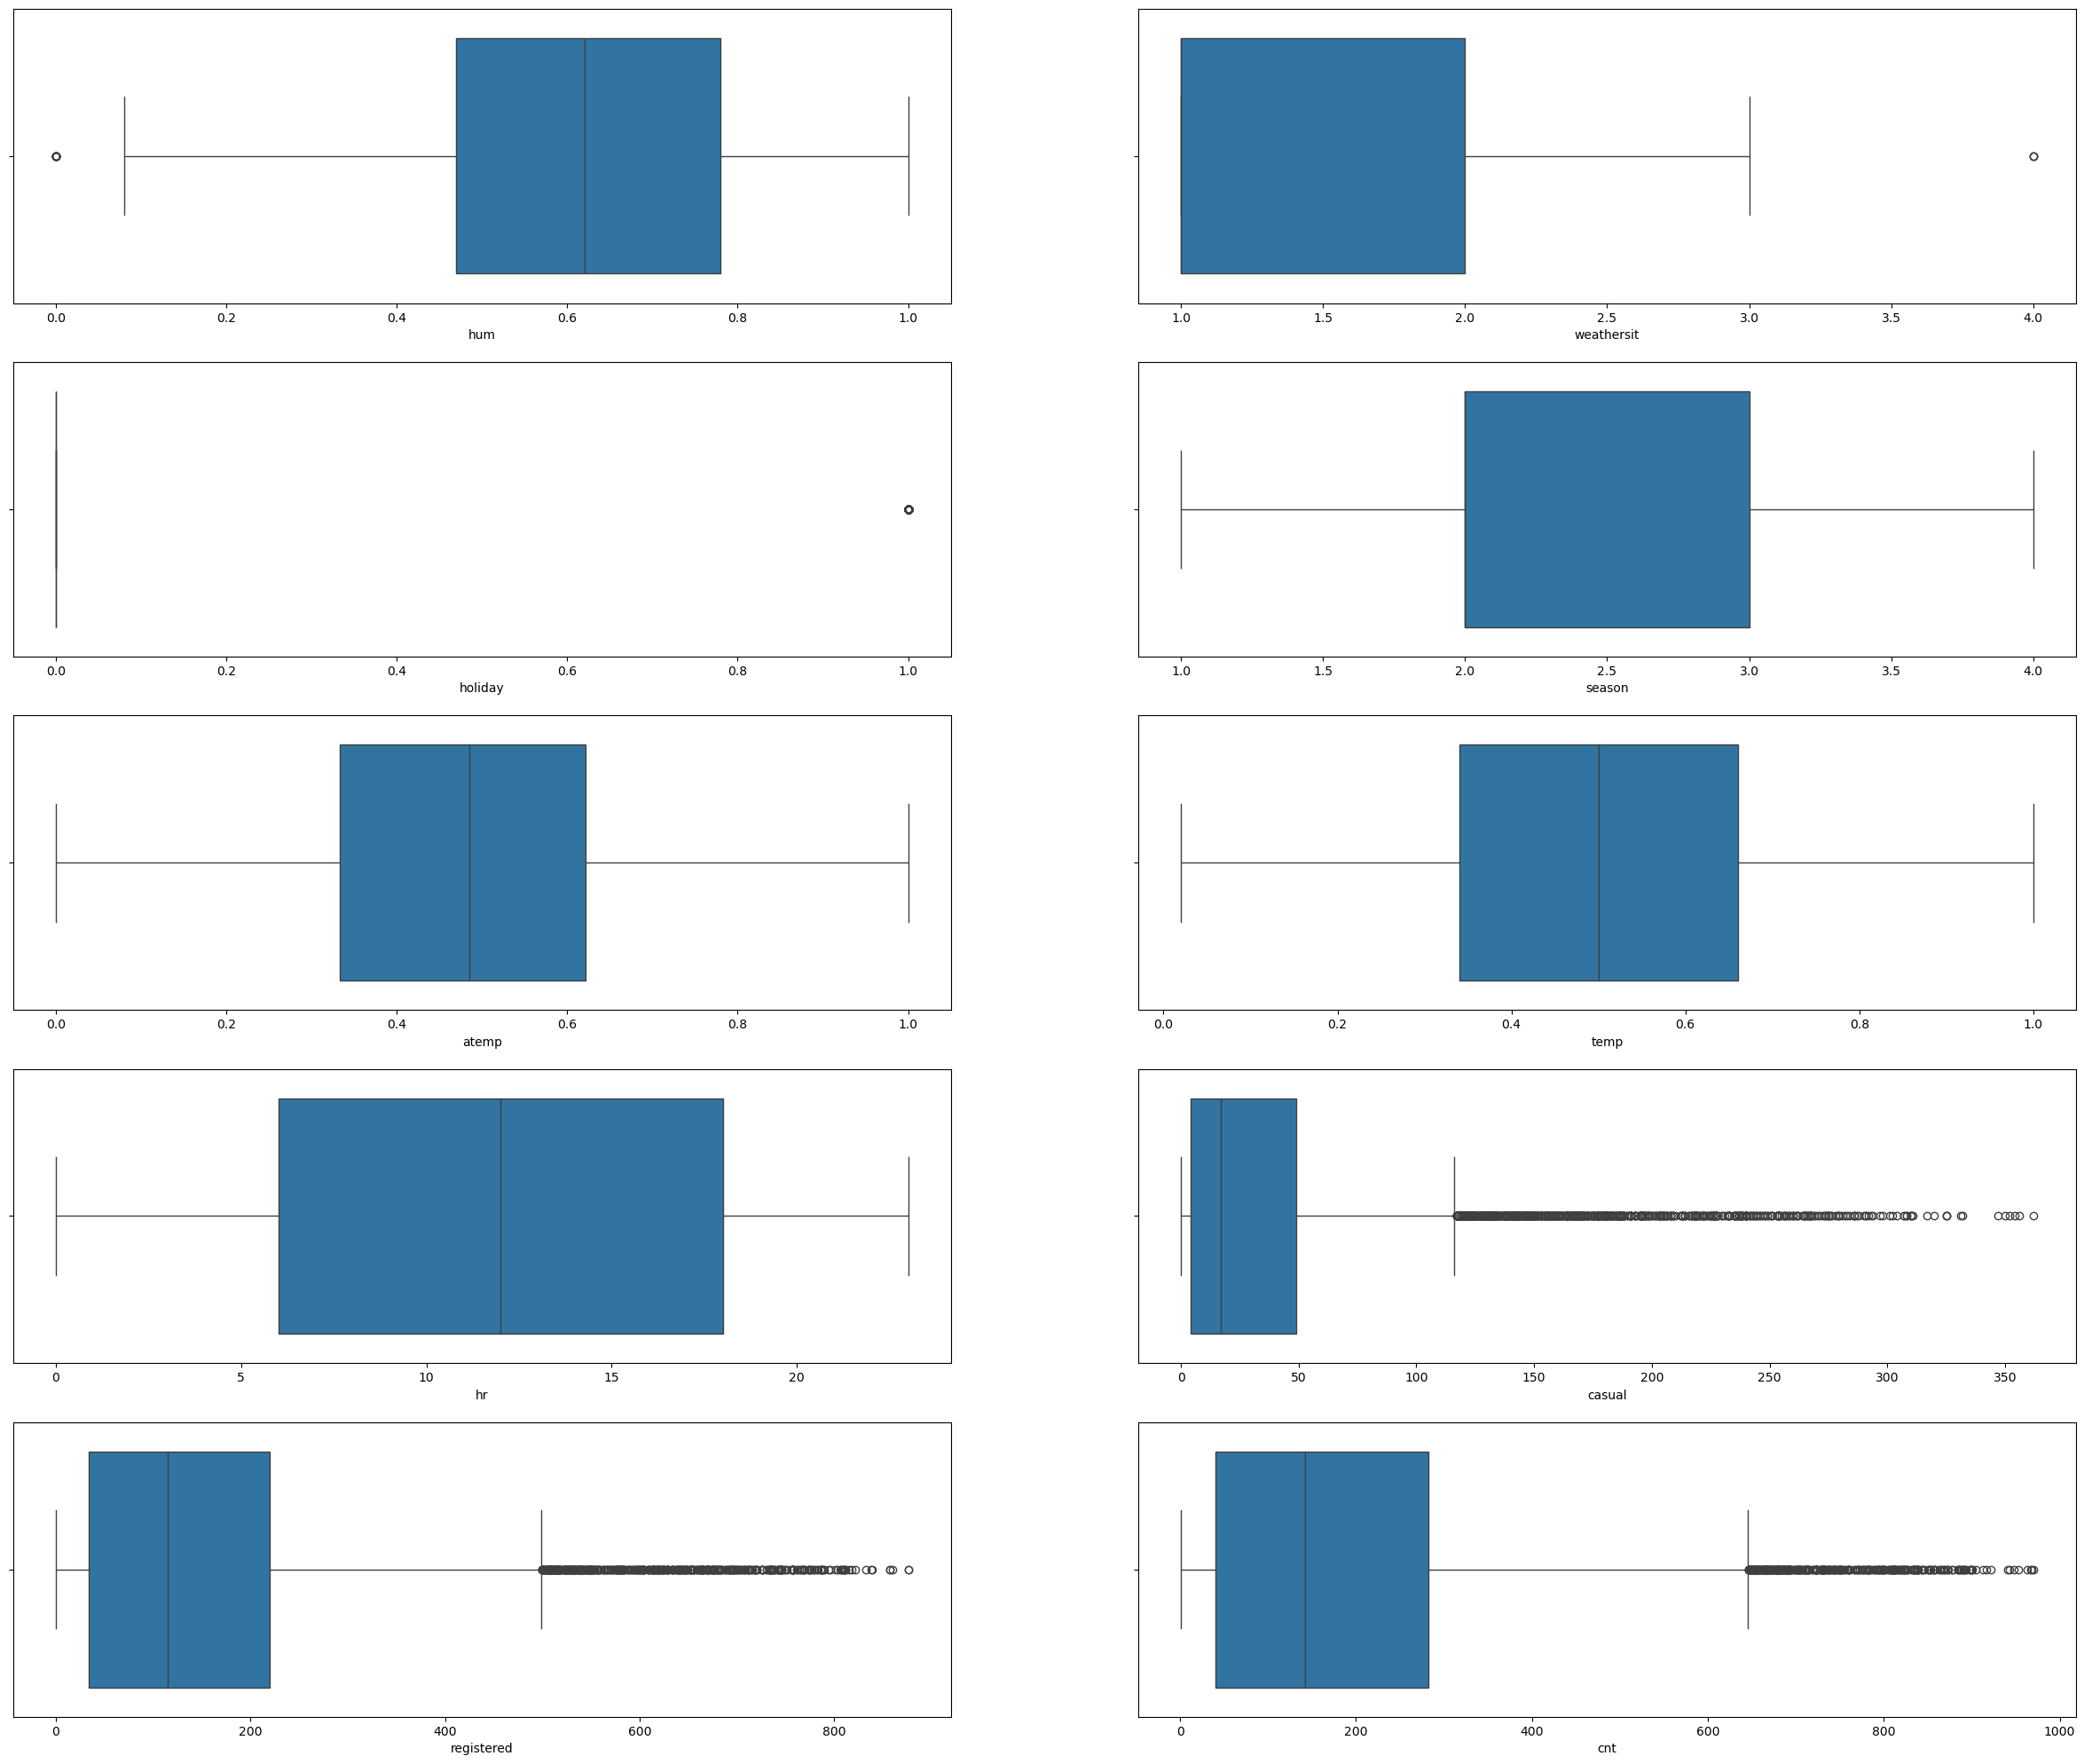

In [15]:
# atur size dari figure
plt.figure(figsize = (30,25)) # kolom, baris

for posisi, nama_kolom in zip(range(1,12), numerik.columns): # posisi 1 sampai 12
    plt.subplot(5,2,posisi) # jumlah baris, jumlah kolom, posisi
    sns.boxplot(x = df[nama_kolom])

plt.show()

<div class="alert alert-info">

Interpretasi Outliers:
1. **Kelembaban (`hum`)** : menunjukkan adanya kondisi penyewaan pada kelembaban yang sangat kering atau sangat lembab, tetapi jumlahnya relatif kecil (0.12% dari total data) sehingga tidak terlalu mempengaruhi analisis.
2. **Pengguna casual** : menunjukkan adanya hari dengan jumlah casual yang sangat tinggi (ekstrem), misalnya ada acara khusus, liburan atau kondisi cuaca yang sangat ideal. Jumlah outliers ini sangat signifikan (sekitar 7% dari total data) sehingga perlu di handle agar tidak mengacaukan model regresi.
3. **Pengguna registered** : menunjukkan adanya hari dengan jumlah registered yang jauh di atas normal, ada kemungkinan terjadi karena hari sibuk atau acara khusus. Jumlah outliers ini cukup signifikan (sekitar 3.9% dari total data).
4. **Totak sewa (`cnt`)** : menunjukkan adanya hari-hari tertentu yang memiliki total penyewaan sangat tinggi akibat dipengaruhi pengguna registered dan casual yang tinggi.


## Uji Statistik

In [16]:
from scipy.stats import normaltest

data = df.select_dtypes(include = 'number')
print ("Uji D'Agustino Pearson")
for tiap_kolom in data.columns:
    stat, pval = normaltest(data[tiap_kolom])
    if pval > 0.05:
        print(f'Kolom {tiap_kolom} memiliki distribusi normal')
    else:
        print(f'Kolom {tiap_kolom} tidak memiliki distribusi normal')



Uji D'Agustino Pearson
Kolom hum tidak memiliki distribusi normal
Kolom weathersit tidak memiliki distribusi normal
Kolom holiday tidak memiliki distribusi normal
Kolom season tidak memiliki distribusi normal
Kolom atemp tidak memiliki distribusi normal
Kolom temp tidak memiliki distribusi normal
Kolom hr tidak memiliki distribusi normal
Kolom casual tidak memiliki distribusi normal
Kolom registered tidak memiliki distribusi normal
Kolom cnt tidak memiliki distribusi normal


<div class="alert alert-info">
Secara umum, data tidak memiliki distribusi normal untuk semua kolomnya.

## Distribusi Data

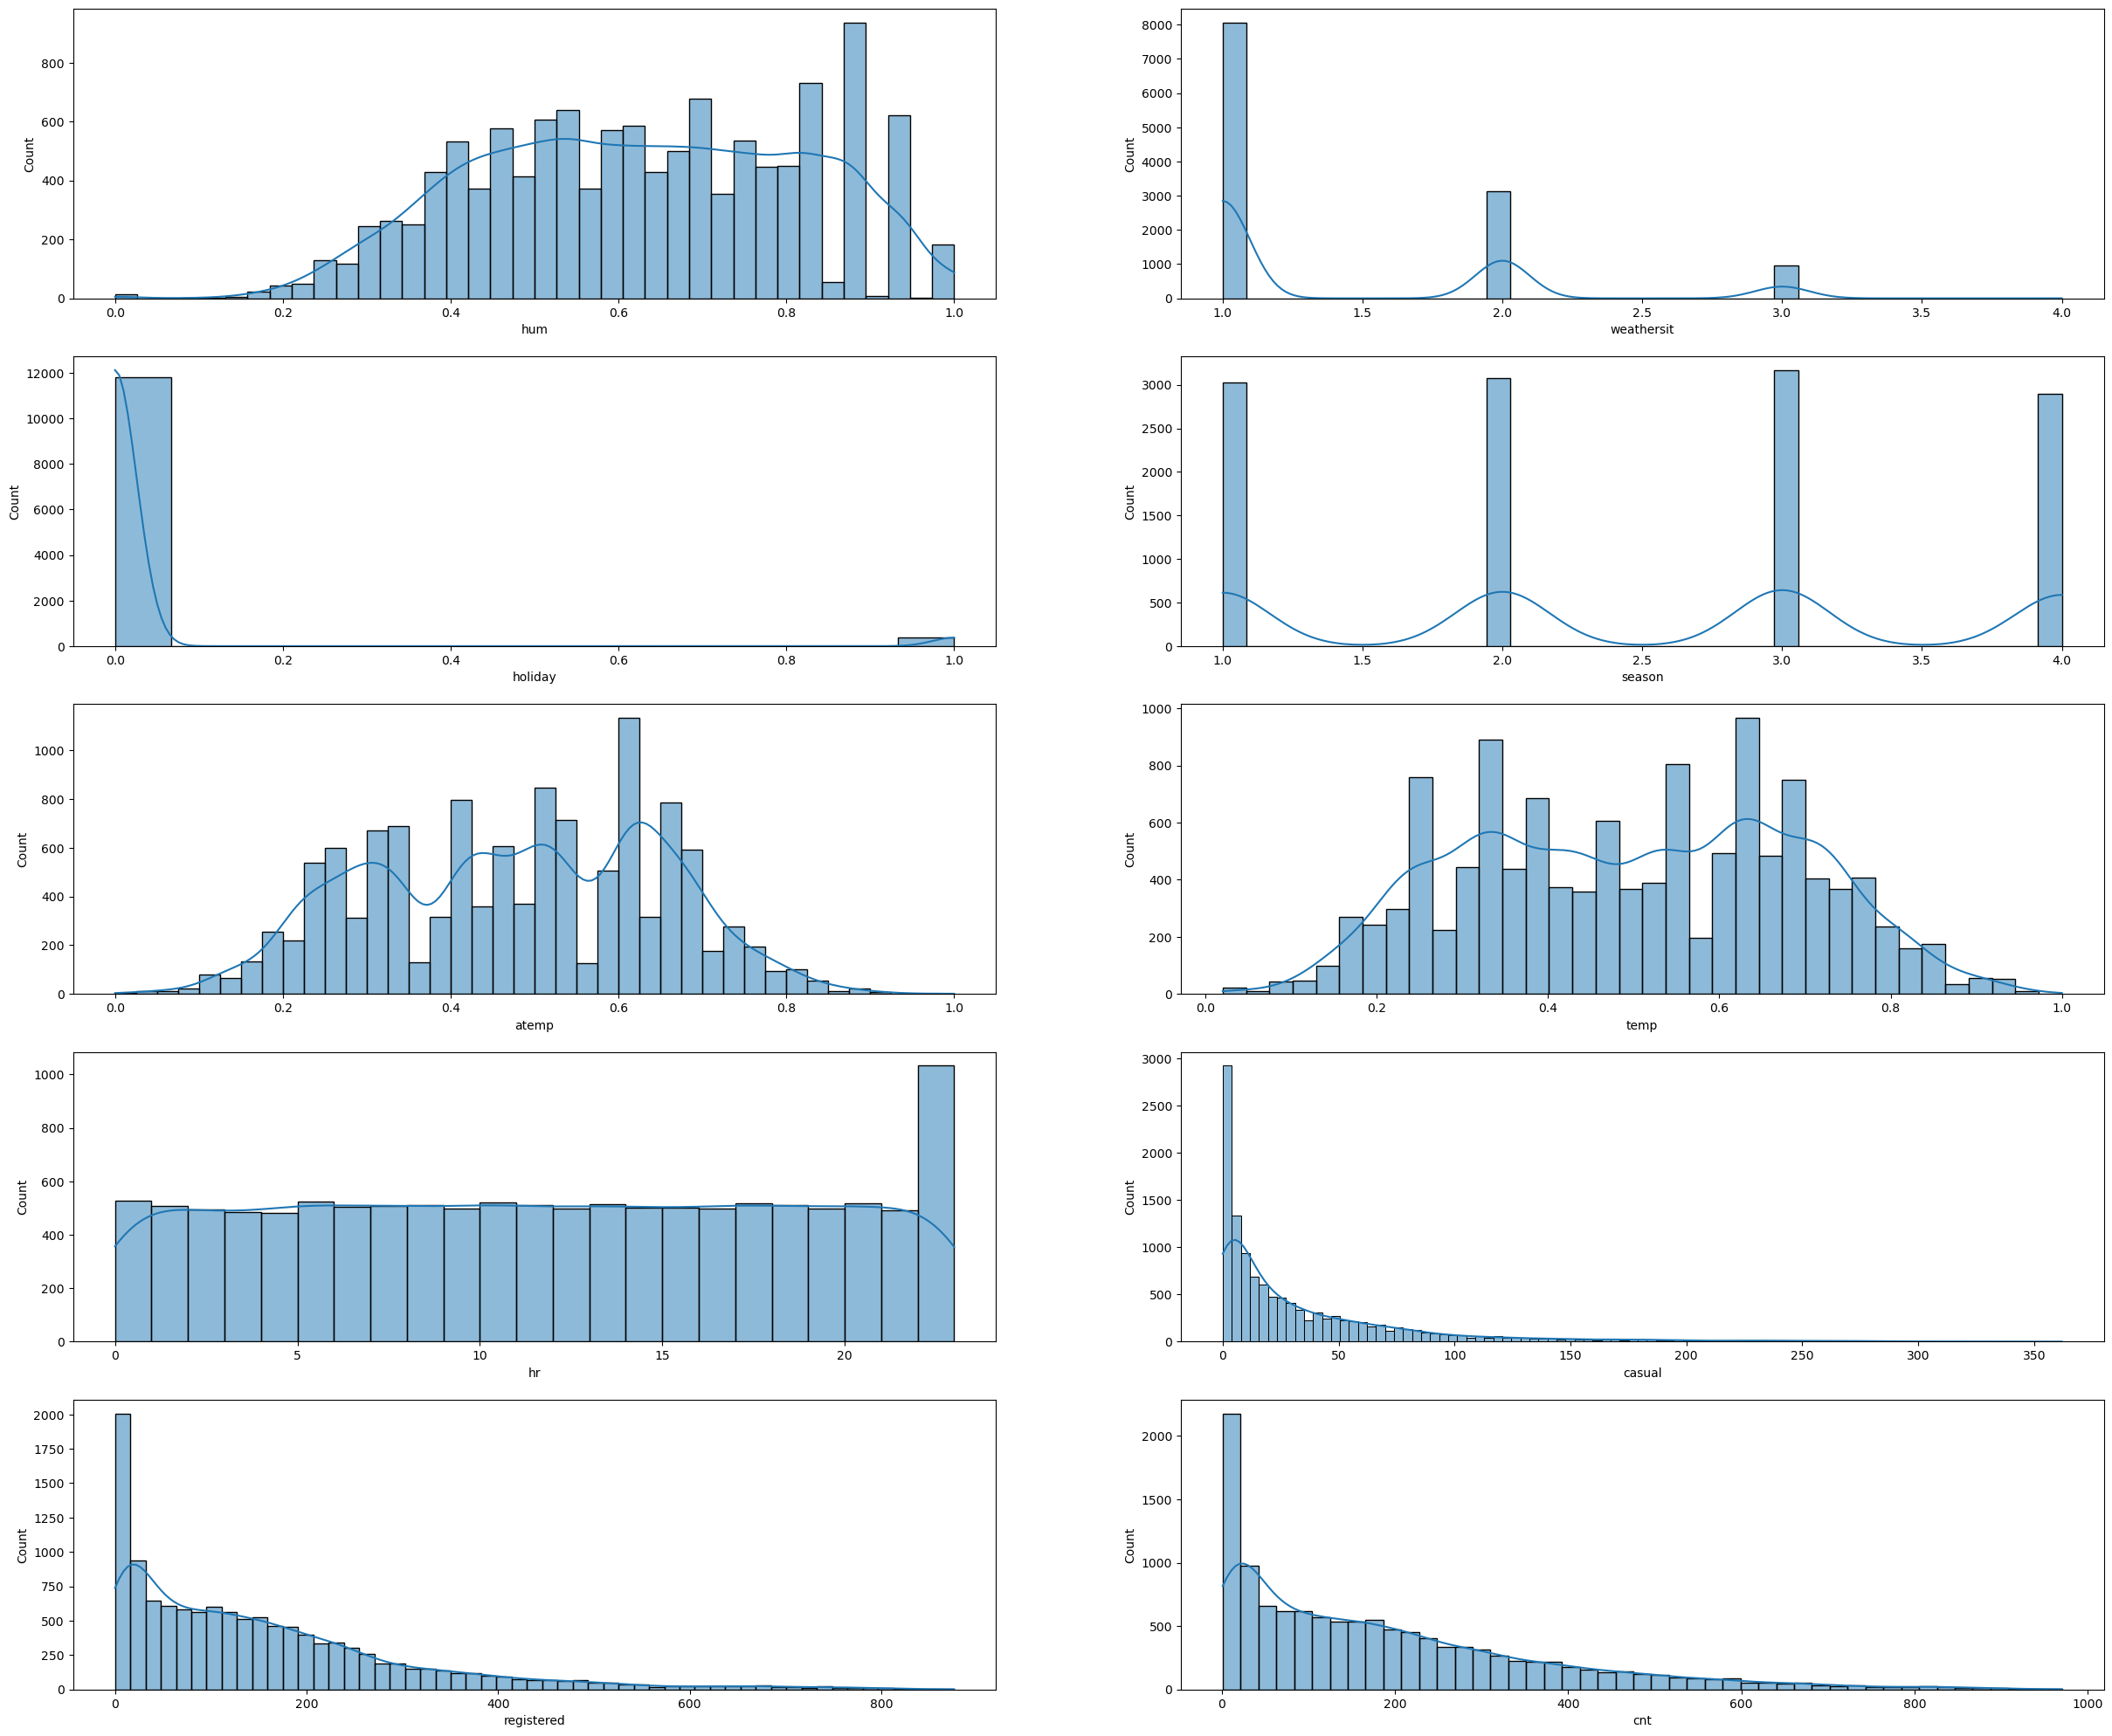

In [17]:
# melihat distribusi data secara visual
# atur size dari figure
plt.figure(figsize = (30,25)) # kolom, baris

for posisi, nama_kolom in zip(range(1,12), numerik.columns):
    plt.subplot(5, 2, posisi) # jumlah baris, jumlah kolom, posisi
    sns.histplot(df[nama_kolom], kde = True)

plt.show()

<div class="alert alert-info">

**Visualisasi Distribusi Data**

Berikut adalah histogram dengan kurva densitas untuk berbagai fitur dalam dataset:

- **hum (Kelembapan)**: Distribusi menunjukkan data terkonsentrasi antara 0.4 hingga 0.9, dengan puncak sekitar 0.7.
- **weatherist**: Distribusi memiliki beberapa puncak (multimodal), dengan nilai utama sekitar 0.5, 1.5, dan 2.5.
- **holiday**: Mayoritas data bernilai 0, dengan sedikit data bernilai 1, menunjukkan hari libur sangat jarang.
- **season**: Distribusi menunjukkan empat puncak yang merata di sekitar 1, 2, 3, dan 4, sesuai dengan empat musim.
- **atemp (Suhu yang Dirasakan)**: Distribusi mirip dengan `hum`, terkonsentrasi antara 0.2 hingga 0.8, dengan puncak sekitar 0.5.
- **temp (Suhu)**: Distribusi miring ke kanan, dengan sebagian besar data antara 0.2 hingga 0.8, dan puncak sekitar 0.4.
- **hr (Jam)**: Distribusi menunjukkan pola harian, dengan puncak pada jam sibuk (sekitar 8 dan 17), dan penurunan pada malam hari.
- **casual**: Distribusi sangat miring ke kanan, dengan sebagian besar nilai rendah (di bawah 100), dan sedikit nilai ekstrem hingga 350.
- **registered**: Distribusi juga miring ke kanan, dengan mayoritas data di bawah 400, dan nilai ekstrem hingga 900.
- **cnt (Jumlah Total)**: Distribusi miring ke kanan, dengan sebagian besar data di bawah 400, dan nilai maksimum mendekati 1000.

**Kesimpulan**: Data menunjukkan variasi distribusi yang signifikan antar fitur, dengan beberapa fitur seperti `casual`, `registered`, dan `cnt` memiliki distribusi miring ke kanan, sementara fitur seperti `season` dan `hr` menunjukkan pola yang lebih terstruktur.

## Normalitas

In [18]:
import scipy.stats as stats
# Selecting numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Initialize a list to store results
results = []

# Loop through each numeric column to check for normality
for col in numeric_cols:
    shapiro_stat, shapiro_p = stats.shapiro(df[col])
    ks_stat, ks_p = stats.kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    dagostino_stat, dagostino_p = stats.normaltest(df[col])

    # Append results to the list with the feature name
    results.append({
        'Column': col,
        'Test Name': 'Shapiro-Wilk',
        'Normality': "Normal" if shapiro_p > 0.05 else "Not Normal"
    })
    results.append({
        'Column': col,
        'Test Name': 'Kolmogorov-Smirnov',
        'Normality': "Normal" if ks_p > 0.05 else "Not Normal"
    })
    results.append({
        'Column': col,
        'Test Name': 'D\'Agostino\'s K^2',
        'Normality': "Normal" if dagostino_p > 0.05 else "Not Normal"
    })

# Create Dataframe from the list
normality_result = pd.DataFrame(results)
normality_result = normality_result.pivot(index='Test Name', columns='Column', values='Normality')
normality_result

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12165.
  res = hypotest_fun_out(*samples, **kwds)


Column,atemp,casual,cnt,holiday,hr,hum,registered,season,temp,weathersit
Test Name,,,,,,,,,,
D'Agostino's K^2,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal
Kolmogorov-Smirnov,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal
Shapiro-Wilk,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal


## Korelasi

<Axes: >

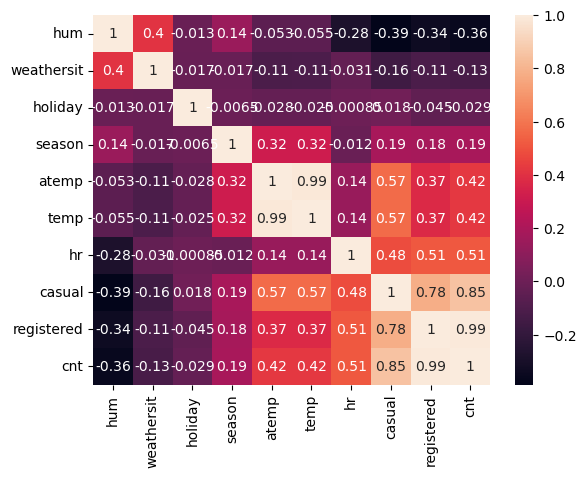

In [19]:
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)


<div class="alert alert-info">

**Matriks Korelasi Fitur**

Berikut adalah matriks korelasi antar fitur dalam dataset:

- **hum (Kelembapan)**: Berkorelasi negatif dengan `atemp` (-0.53) dan `temp` (-0.55), serta sedikit negatif dengan `casual` (-0.39), `registered` (-0.34), dan `cnt` (-0.36).

- **weathersit**: Memiliki korelasi positif rendah dengan `hum` (0.4), dan sangat rendah dengan fitur lainnya.

- **holiday**: Berkorelasi sangat rendah dengan semua fitur, dengan nilai tertinggi pada `registered` (-0.045).

- **season**: Berkorelasi sedang dengan `atemp` (0.32) dan `temp` (0.32), serta rendah dengan `casual` (0.19).

- **atemp (Suhu yang Dirasakan)**: Berkorelasi sangat tinggi dengan `temp` (0.99), serta cukup tinggi dengan `casual` (0.57), `registered` (0.37), dan `cnt` (0.42).

- **temp (Suhu)**: Berkorelasi sangat tinggi dengan `atemp` (0.99), dan memiliki korelasi yang sama dengan `casual` (0.57), `registered` (0.37), dan `cnt` (0.42).

- **hr (Jam)**: Berkorelasi sedang dengan `casual` (0.48), `registered` (0.51), dan `cnt` (0.51).

- **casual**: Berkorelasi tinggi dengan `registered` (0.78) dan `cnt` (0.85).

- **registered**: Berkorelasi sangat tinggi dengan `cnt` (0.99), menunjukkan kontribusi besar terhadap jumlah total.

- **cnt (Jumlah Total)**: Merupakan kombinasi dari `casual` dan `registered`, sehingga memiliki korelasi sangat tinggi dengan keduanya (0.85 dan 0.99).

**Kesimpulan**: Fitur `temp` dan `atemp` sangat berkorelasi (0.99), menunjukkan potensi multikolinearitas. Fitur `cnt` sangat dipengaruhi oleh `registered` (0.99) dan `casual` (0.85). Fitur seperti `holiday` dan `weathersit` memiliki korelasi rendah dengan fitur lainnya.

## Multikol

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    # menghitung vif untuk setiap kolom nya
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

calc_vif(numerik.drop(columns = 'cnt')).sort_values(by = 'VIF', ascending = False)


,variables,VIF
4,atemp,341.087977
5,temp,306.849662
0,hum,12.920644
1,weathersit,7.151265
3,season,6.963636
6,hr,4.039528
8,registered,3.093553
7,casual,2.584010
2,holiday,1.036865


<div class="alert alert-info">

**atemp** (341.08) dan **temp** (306.85) memiliki nilai VIF yang sangat tinggi, menunjukkan multikolinearitas yang sangat kuat di antara keduanya. Ini berarti kedua variabel ini sangat berkorelasi satu sama lain dan bisa saling menggantikan.

**hum** (12.92), **weathersit** (7.15), dan **season** (6.96) juga memiliki VIF tinggi, menunjukkan korelasi yang signifikan dengan variabel lain.

**registered** (3.09) dan **casual** (2.58) memiliki VIF yang lebih rendah, menunjukkan mereka memiliki korelasi yang lebih sedikit dengan variabel lain.

Variabel dengan VIF tinggi (terutama di atas 10) perlu dievaluasi, dan mungkin ada baiknya mempertimbangkan untuk menghapus salah satunya untuk mengurangi multikolinearitas. Sehingga **atemp** akan di drop.

Variabelcasualdan registered memiliki nilai VIF yang rendah, namun ternyata merupakan informasi yang sama. Sebaiknya di drop karena merupakan overlapping information (redundant) terhadap cnt

In [21]:
#Data kategorik
kategorik = df.select_dtypes(include = 'object')
kategorik

""
0
1
2
3
4
...
12160
12161
12162
12163


## Clean Data


In [22]:
df_clean = df.copy()
display(df_clean.shape)
df_clean.head(2)

(12165, 11)

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18


In [23]:
df_clean.drop_duplicates(subset=subset_columns,keep='first',inplace=True)
display(df_clean.shape)
df_clean.head(2)

(12154, 11)

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18


In [24]:
df_clean = df_clean.drop(['atemp','casual','registered'],axis=1)
df_clean.head()

,dteday,hum,weathersit,holiday,season,temp,hr,cnt
0,2011-12-09,0.62,1,0,4,0.36,16,250
1,2012-06-17,0.64,1,0,2,0.54,4,18
2,2011-06-15,0.53,1,0,2,0.62,23,107
3,2012-03-31,0.87,2,0,2,0.36,8,145
4,2012-07-31,0.55,1,0,3,0.76,18,857


In [25]:
# Split kolom `dteday`
df_clean['year'] = df_clean['dteday'].dt.year
df_clean ['month'] = df_clean['dteday'].dt.month
df_clean ['day'] = df_clean['dteday'].dt.day_name()

df_clean['holiday'] = df_clean['holiday'].astype('category')
df_clean['year'] = df_clean['year'].astype('category')
df_clean['month'] = df_clean['month'].astype('category')

df_clean = df_clean.drop(['dteday'],axis=1)
df_clean.head()

,hum,weathersit,holiday,season,temp,hr,cnt,year,month,day
0,0.62,1,0,4,0.36,16,250,2011,12,Friday
1,0.64,1,0,2,0.54,4,18,2012,6,Sunday
2,0.53,1,0,2,0.62,23,107,2011,6,Wednesday
3,0.87,2,0,2,0.36,8,145,2012,3,Saturday
4,0.55,1,0,3,0.76,18,857,2012,7,Tuesday


In [26]:
df_clean['holiday'] = df_clean['holiday'].replace({0:'bukan libur',1:'libur'})
df_clean['season'] = df_clean['season'].replace({1:'dingin',2:'semi',3:'panas',4:'gugur'})
df_clean

/var/folders/tl/nkgrs2rj2xsby6cq2kdklvxw0000gn/T/ipykernel_27853/1878046775.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_clean['holiday'] = df_clean['holiday'].replace({0:'bukan libur',1:'libur'})


,hum,weathersit,holiday,season,temp,hr,cnt,year,month,day
0,0.62,1,bukan libur,gugur,0.36,16,250,2011,12,Friday
1,0.64,1,bukan libur,semi,0.54,4,18,2012,6,Sunday
2,0.53,1,bukan libur,semi,0.62,23,107,2011,6,Wednesday
3,0.87,2,bukan libur,semi,0.36,8,145,2012,3,Saturday
4,0.55,1,bukan libur,panas,0.76,18,857,2012,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,bukan libur,dingin,0.24,7,257,2012,1,Wednesday
12161,0.62,1,bukan libur,panas,0.78,0,102,2012,7,Friday
12162,0.60,2,libur,dingin,0.24,5,6,2012,2,Monday
12163,0.77,2,bukan libur,semi,0.42,2,69,2012,3,Saturday


In [27]:
df_clean.head()

,hum,weathersit,holiday,season,temp,hr,cnt,year,month,day
0,0.62,1,bukan libur,gugur,0.36,16,250,2011,12,Friday
1,0.64,1,bukan libur,semi,0.54,4,18,2012,6,Sunday
2,0.53,1,bukan libur,semi,0.62,23,107,2011,6,Wednesday
3,0.87,2,bukan libur,semi,0.36,8,145,2012,3,Saturday
4,0.55,1,bukan libur,panas,0.76,18,857,2012,7,Tuesday


In [28]:
print(f'Total baris data yang dicleaning: {df.shape[0] - df_clean.shape[0]}')

Total baris data yang dicleaning: 11


# EDA Exploratory Data Analysis

## Data Unik

In [29]:
df_eda =df_clean
def data_unik(df_clean):
    data_unik = pd.DataFrame()
    data_unik ['Kolom'] = df_clean.columns
    data_unik ['Jumlah data unik'] = [df_clean[kolom].nunique() for kolom in df_clean.columns]
    data_unik ['Data unik'] = [df_clean[kolom].unique() for kolom in df_clean.columns]

    data_unik.index +=1

    return data_unik

data_unik(df_clean)

,Kolom,Jumlah data unik,Data unik
1,hum,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.9..."
2,weathersit,4,"[1, 2, 3, 4]"
3,holiday,2,"['bukan libur', 'libur'] Categories (2, object..."
4,season,4,"[gugur, semi, panas, dingin]"
5,temp,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82..."
6,hr,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21,..."
7,cnt,830,"[250, 18, 107, 145, 857, 45, 216, 40, 7, 534, ..."
8,year,2,"[2011, 2012] Categories (2, int32): [2011, 2012]"
9,month,12,"[12, 6, 3, 7, 10, ..., 2, 5, 9, 4, 11] Length:..."
10,day,7,"[Friday, Sunday, Wednesday, Saturday, Tuesday,..."


In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12154 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         12154 non-null  float64 
 1   weathersit  12154 non-null  int64   
 2   holiday     12154 non-null  category
 3   season      12154 non-null  object  
 4   temp        12154 non-null  float64 
 5   hr          12154 non-null  int64   
 6   cnt         12154 non-null  int64   
 7   year        12154 non-null  category
 8   month       12154 non-null  category
 9   day         12154 non-null  object  
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 795.7+ KB


## Jumlah Sewa Berdasarkan Musim

/var/folders/tl/nkgrs2rj2xsby6cq2kdklvxw0000gn/T/ipykernel_27853/1961884434.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=jumlah_penyewa_per_musim.index, y=jumlah_penyewa_per_musim.values, palette='viridis')


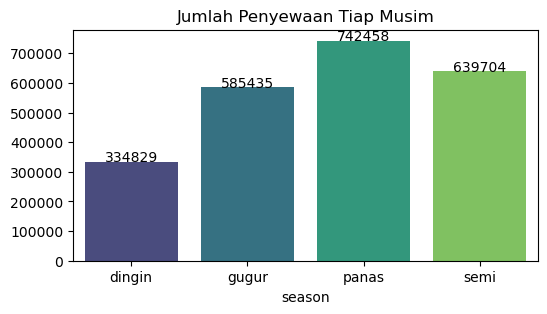

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah penyewaan per musim
jumlah_penyewa_per_musim = df_eda.groupby('season')['cnt'].sum()

# Membuat plot
plt.figure(figsize=(6, 3))
barplot = sns.barplot(x=jumlah_penyewa_per_musim.index, y=jumlah_penyewa_per_musim.values, palette='viridis')
plt.title('Jumlah Penyewaan Tiap Musim')

# Menambahkan keterangan nama musim di setiap bar
for index, value in enumerate(jumlah_penyewa_per_musim.values):
    plt.text(index , value, f'{value:.0f}', ha='center')

# Menampilkan plot
plt.show()

<div class="alert alert-info">
Jumlah penyewa paling banyak adalah pada saat musim panas

## Jumlah penyewa terhadap fitur lain

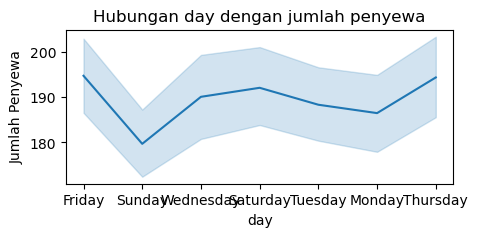

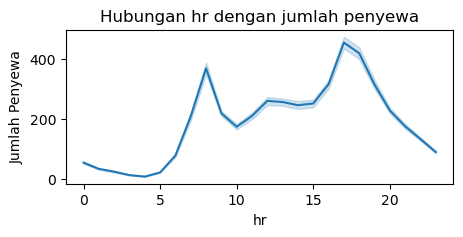

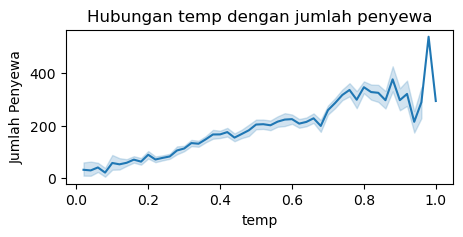

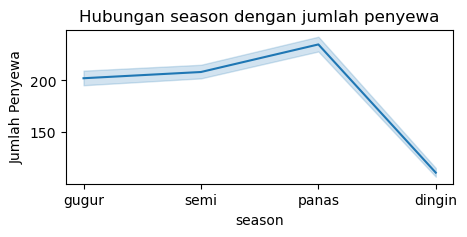

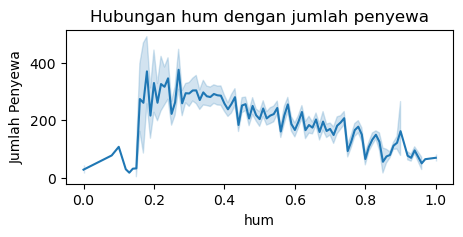

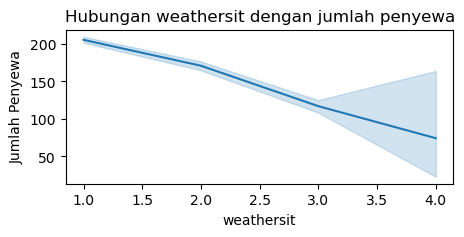

In [32]:
data = ['day','hr','temp','season','hum','weathersit']

posisi = 1
for i in data:
    plt.figure(figsize=(5,2))
    sns.lineplot(x=i,y = 'cnt',data=df_eda)

    plt.title(f'Hubungan {i} dengan jumlah penyewa')
    plt.xlabel(i)
    plt.ylabel('Jumlah Penyewa')
    posisi +=1
    plt.show()


<div class="alert alert-info">
Jika kita melakukan perbandingan antara fitur hari, jam, dan suhu terhadap jumlah penyewa, diperoleh hasil sbagai berikut:

- Jumlah penyewa secara perlahan meningkat dari hari-1 (senin) dan mulai berkurang setelah weekend di hari 6 (Sabtu) dan sangat rendah di hari minggu

- Jumlah penyewa fulktuatif pada pagi hari (6-12) cenderung lebih tinggi pada jam 7-8, meningkat di siang hari (12-18), dan berkurang di malam hari (18-6)

- Jumlah penyewa cenderung meningkat seiring dengan penambahan suhu

- Jumlah penyewa cenderung mneurun seiring dengan perubahan musim dingin

- Penyewaan cenderung lebih tinggi pada kelembapan rendah, namun pengaruhnya bervariasi dan tidak linear.


## Distribusi Fitur dan Target

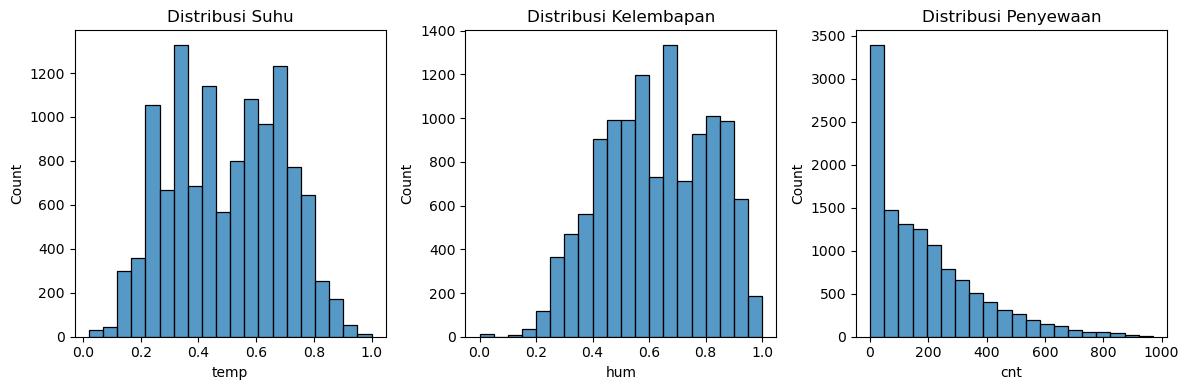

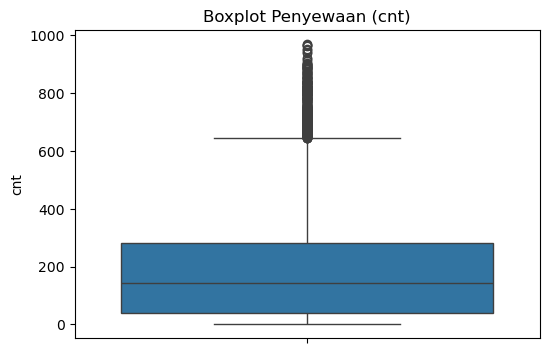

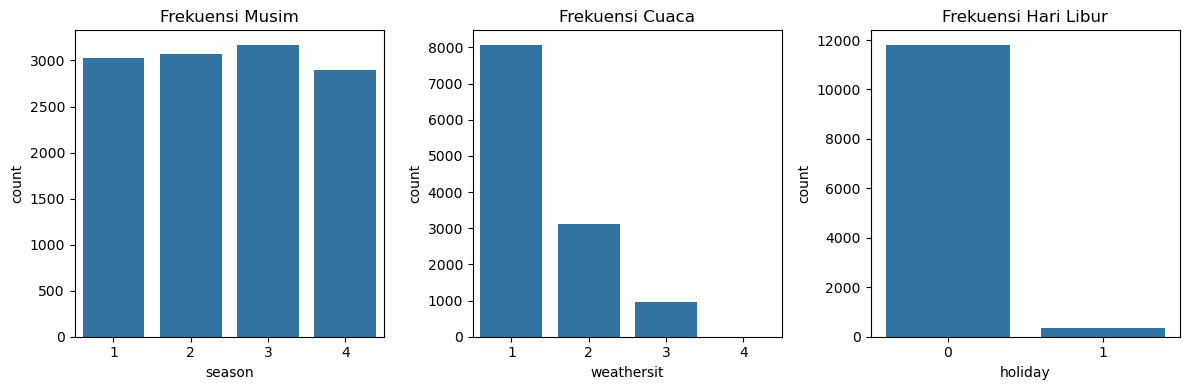

In [33]:
# Histogram untuk fitur numerik
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['temp'], bins=20)
plt.title('Distribusi Suhu')
plt.subplot(1, 3, 2)
sns.histplot(df['hum'], bins=20)
plt.title('Distribusi Kelembapan')
plt.subplot(1, 3, 3)
sns.histplot(df['cnt'], bins=20)
plt.title('Distribusi Penyewaan')
plt.tight_layout()
plt.show()

# Boxplot untuk cnt
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['cnt'])
plt.title('Boxplot Penyewaan (cnt)')
plt.show()

# Bar plot untuk fitur kategorikal
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(x=df['season'])
plt.title('Frekuensi Musim')
plt.subplot(1, 3, 2)
sns.countplot(x=df['weathersit'])
plt.title('Frekuensi Cuaca')
plt.subplot(1, 3, 3)
sns.countplot(x=df['holiday'])
plt.title('Frekuensi Hari Libur')
plt.tight_layout()
plt.show()

<div class="alert alert-info">

 **Temuan**

**Pola Penyewaan:**
 - Penyewaan sepeda cenderung berjumlah rendah pada hari-hari biasa, dengan beberapa hari yang memiliki lonjakan penyewaan yang signifikan (outlier)

**Pengaruh Cuaca:**

- Suhu berkorelasi positif dengan penyewaan (0.4)
- Kelembapan berkorelasi negatif lemah dengan penyewaan (-0.32)
- Mayoritas penyewaan terjadi saat cuaca cerah (kategori 1)


**Faktor Musim:**

- Semua musim memiliki frekuensi yang relatif seimbang, dengan sedikit peningkatan pada musim panas
- Pengaruh Hari Libur: Meskipun data hari libur lebih sedikit, pola distribusi penyewaan menunjukkan perilaku yang berbeda antara hari libur
dan bukan libur (terlihat dari outlier pada boxplot)
- Segmentasi Pengguna: Dari matriks korelasi sebelumnya, pengguna terdaftar (registered) adalah kontributor utama terhadap total penyewaan
dengan korelasi 0.97, sementara pengguna kasual memiliki korelasi 0.7 dengan total penyewaan**

## Korelasi Antar Fitur

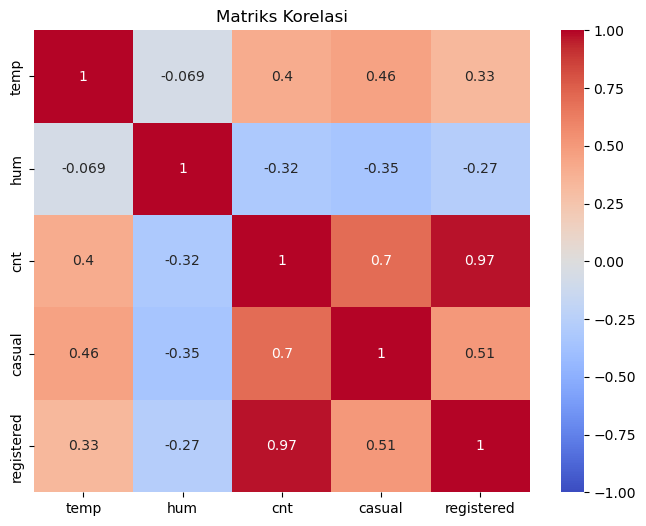

In [34]:
# Matriks korelasi
corr_matrix = df[['temp', 'hum', 'cnt', 'casual', 'registered']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi')
plt.show()

<div class="alert alert-info">

**Interpretasi Matriks Korelasi**

- **temp**:
  - Berkorelasi negatif rendah dengan `hum` (-0.069).
  - Berkorelasi positif sedang dengan `cnt` (0.4), `casual` (0.46), dan `registered` (0.33).
- **hum**:
  - Berkorelasi negatif rendah dengan `cnt` (-0.32), `casual` (-0.35), dan `registered` (-0.27).
- **cnt**:
  - Berkorelasi tinggi dengan `casual` (0.7) dan sangat tinggi dengan `registered` (0.97), menunjukkan bahwa `cnt` sangat dipengaruhi oleh kedua fitur ini.
- **casual**:
  - Berkorelasi sedang dengan `registered` (0.51).
- **registered**:
  - Memiliki korelasi tertinggi dengan `cnt` (0.97), menunjukkan kontribusi besar terhadap jumlah total penyewa.

## Hubungan Fitur dengan Target (cnt)

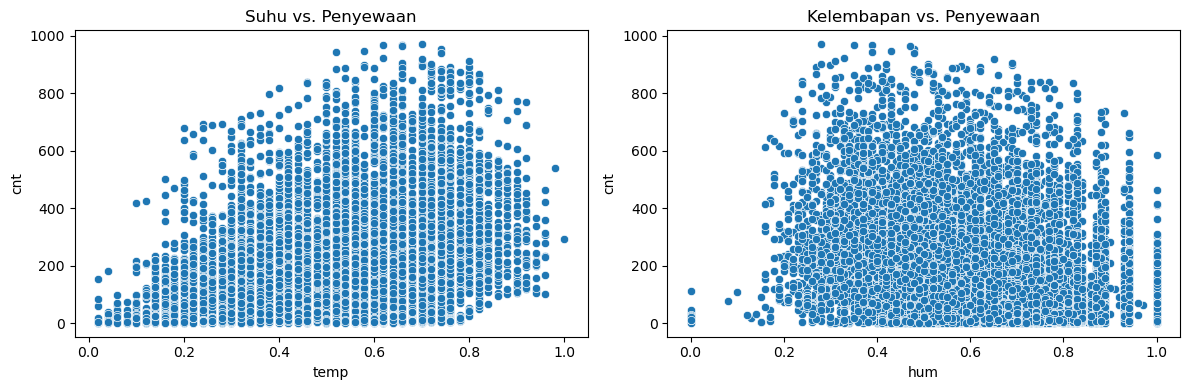

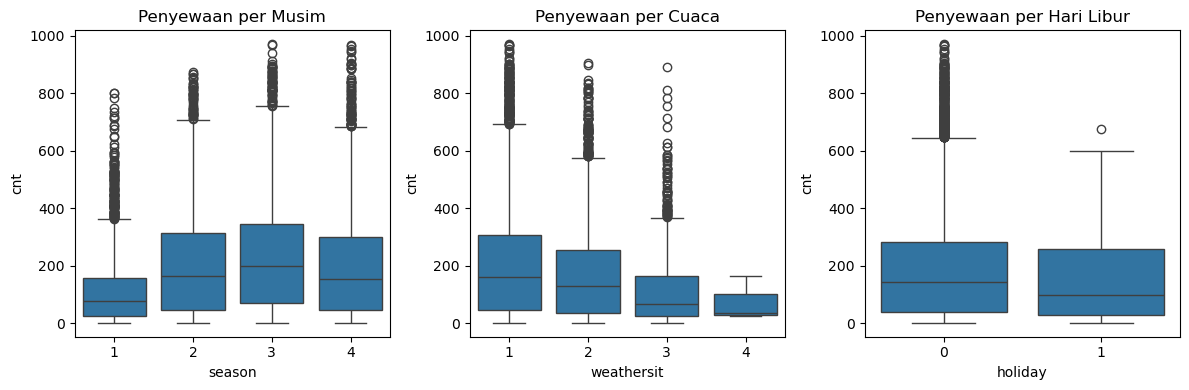

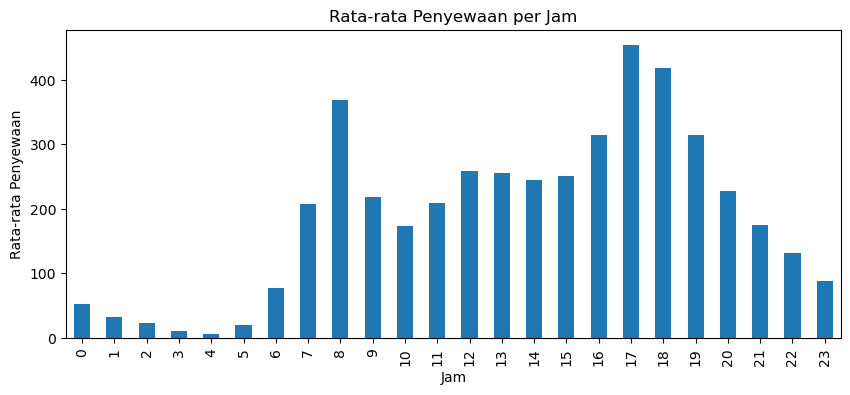

In [35]:
# Scatter plot untuk fitur numerik
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['temp'], y=df['cnt'])
plt.title('Suhu vs. Penyewaan')
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['hum'], y=df['cnt'])
plt.title('Kelembapan vs. Penyewaan')
plt.tight_layout()
plt.show()

# Boxplot untuk fitur kategorikal
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['season'], y=df['cnt'])
plt.title('Penyewaan per Musim')
plt.subplot(1, 3, 2)
sns.boxplot(x=df['weathersit'], y=df['cnt'])
plt.title('Penyewaan per Cuaca')
plt.subplot(1, 3, 3)
sns.boxplot(x=df['holiday'], y=df['cnt'])
plt.title('Penyewaan per Hari Libur')
plt.tight_layout()
plt.show()

# Bar plot rata-rata cnt per jam
avg_cnt_by_hr = df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10, 4))
avg_cnt_by_hr.plot(kind='bar')
plt.title('Rata-rata Penyewaan per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

<div class="alert alert-info">

**Analisis scatter plot menunjukkan:**

- **Suhu vs Penyewaan**: Menunjukkan pola kurva bel dengan penyewaan tertinggi pada suhu sekitar 0.6-0.7 (skala 0-1). Penyewaan menurun pada suhu yang sangat rendah dan sangat tinggi.
- **Kelembaban vs Penyewaan**: Menunjukkan korelasi negatif lemah dengan penyewaan tertinggi terjadi pada kelembaban rendah hingga sedang (0.3-0.6).
- **Zona Kenyamanan**: Kombinasi suhu hangat (0.5-0.7) dengan kelembaban tidak terlalu tinggi menciptakan kondisi optimal untuk penyewaan sepeda.

**Analisis boxplot menunjukkan:**

**Berdasarkan Musim**

Musim Panas menunjukkan median penyewaan tertinggi
Musim Dingin konsisten menunjukkan penyewaan terendah
Musim Gugur dan Semi memiliki penyewaan sedang dengan variabilitas tinggi

**Berdasarkan Kondisi Cuaca**

Cuaca Kategori 1 (cerah/baik) menunjukkan penyewaan tertinggi
Terdapat penurunan progresif seiring memburuknya kondisi cuaca (kategori 2-4)
Cuaca Kategori 4 (buruk/ekstrem) konsisten menunjukkan penyewaan rendah

**Berdasarkan Hari Libur**

Perbedaan median penyewaan antara hari libur dan bukan libur relatif minimal
Hari bukan libur menunjukkan variabilitas yang lebih tinggi dan memiliki lebih banyak outlier

**Grafik rata-rata penyewaan per jam menunjukkan:**

**Dua Puncak Utama:**

Puncak pagi sekitar jam 8 (±375 penyewaan)
Puncak sore/malam sekitar jam 17-18 (±450 penyewaan)


- Jam Terendah: Dini hari (jam 3-4) dengan kurang dari 20 penyewaan
- Pola "Commuter" yang jelas, mengindikasikan penggunaan sepeda sebagai moda transportasi kerja
- Aktivitas Siang Hari (jam 10-15) relatif stabil sekitar 200-250 penyewaan

# MODELING

## Data Prep

In [36]:
# data prep
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, StandardScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder



## Data Split

In [37]:
# Memisahkan data independen variabel dengan target
x = df_clean.drop(columns = ['cnt'])
y = df_clean['cnt']

x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 2024)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((9723, 9), (2431, 9), (9723,), (2431,))

## Preprocessing

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder

transformer = ColumnTransformer([
    ('onehot',OneHotEncoder(drop = 'first'),['holiday', 'season']),
    ('ordinal',OrdinalEncoder(),['day','month','year']),
    ('minmax',MinMaxScaler(),['temp', 'hr'])
],remainder = 'passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['holiday', 'season']),
                                ('ordinal', OrdinalEncoder(),
                                 ['day', 'month', 'year']),
                                ('minmax', MinMaxScaler(), ['temp', 'hr'])])

## Modelling

In [39]:
# Import required libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np
import pandas as pd
#standardscaler
from sklearn.preprocessing import StandardScaler

# model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.compose import TransformedTargetRegressor

# evaluation
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer

<div class="alert alert-info">

Saya mencoba menggunakan 8 model tanpa membersihkan outlier terlebih dahulu. Model-model tersebut adalah:

1. Linear Regression
2. Decision Tree
3. KNN
4. Random Forest
5. Gradient Boosting
6. Support Vector Regression
8. XGBoost
9. LightGBM


## Cross Validation

In [40]:

# Base model/algoritma yang digunakan
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=2024)
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor(random_state=2024)
xgb = XGBRegressor(random_state=2024)
cb = CatBoostRegressor(random_state=2024, verbose=0)
gb = GradientBoostingRegressor(random_state=2024)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [lr,dt,knn,rf,xgb,cb,gb]

# Menyimpan skor
score_mae, score_mse, score_rmse, score_mape, score_r2 = [], [], [], [], []

nilai_mean_mae = []
nilai_mean_mse= []
nilai_mean_rmse = []
nilai_mean_mape= []
nilai_mean_r2 = []

test_mae, test_mse, test_rmse, test_mape, test_r2 = [], [], [], [], []

# Loop untuk setiap model
for model in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)

    pipeline = Pipeline([
        ('transformer',transformer),
        ('scaler',scaler),
        ('model',model)
    ])

    # Cross-Validation MAE
    score_cv_mae = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_mean_absolute_error', error_score='raise')
    score_mae.append(score_cv_mae)
    nilai_mean_mae.append(-score_cv_mae.mean())

    # Cross-Validation MSE
    score_cv_mse = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_mean_squared_error', error_score='raise')
    score_mse.append(score_cv_mse)
    nilai_mean_mse.append(-score_cv_mse.mean())

    # Cross-Validation RMSE
    score_cv_rmse = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_root_mean_squared_error', error_score='raise')
    score_rmse.append(score_cv_rmse)
    nilai_mean_rmse.append(-score_cv_rmse.mean())

    # Cross-Validation MAPE
    score_cv_mape = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error', error_score='raise')
    score_mape.append(score_cv_mape)
    nilai_mean_mape.append(-score_cv_mape.mean())

    # Cross-Validation R-Squared
    score_cv_r2 = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='r2', error_score='raise')
    score_r2.append(score_cv_r2)
    nilai_mean_r2.append(score_cv_r2.mean())

    # Melakukan fit dan prediksi pada data test
    pipeline.fit(x_train, y_train)
    y_pred_test = pipeline.predict(x_test)

    # Menghitung MAE, MSE, RMSE, MAPE, dan R² pada test data
    test_mae.append(mean_absolute_error(y_test, y_pred_test))
    test_mse.append(mean_squared_error(y_test, y_pred_test))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    test_mape.append(mean_absolute_percentage_error(y_test, y_pred_test))
    test_r2.append(r2_score(y_test, y_pred_test))

# Evaluasi hasil
based_model_non_outliers = pd.DataFrame({
    'Model': ['Linear Regression', 'DecisionTree Regression', 'KNN Regression', 'RandomForest Regression', 'XGBoost Regression', 'CatBoostRegressor','GradientBoostingRegressor'],

    'Mean_MAE': nilai_mean_mae,
    'Test_MAE': test_mae,

    'Mean_MSE': nilai_mean_mse,
    'Test_MSE': test_mse,

    'Mean_RMSE': nilai_mean_rmse,
    'Test_RMSE': test_rmse,

    'Mean_MAPE': nilai_mean_mape,
    'Test_MAPE': test_mape,

    'Mean_R-Squared': nilai_mean_r2,
    'Test_R-Squared': test_r2
})

based_model_non_outliers

,Model,Mean_MAE,Test_MAE,Mean_MSE,Test_MSE,Mean_RMSE,Test_RMSE,Mean_MAPE,Test_MAPE,Mean_R-Squared,Test_R-Squared
0,Linear Regression,105.646706,106.438723,19870.213810,20676.641831,140.926901,143.793748,3.370136,3.172224,0.388786,0.393269
1,DecisionTree Regression,40.736844,40.113739,4810.056617,5096.857363,69.317115,71.392278,0.441381,0.429381,0.851897,0.850439
2,KNN Regression,70.630543,68.302262,11379.771980,10665.151855,106.664519,103.272222,1.601248,1.380488,0.649650,0.687044
3,RandomForest Regression,31.534552,30.646391,2677.184256,2589.585708,51.722029,50.887972,0.389293,0.342748,0.917619,0.924012
4,XGBoost Regression,28.427110,27.389744,2012.668408,1823.157959,44.845618,42.698454,0.460726,0.398798,0.937915,0.946502
5,CatBoostRegressor,27.551242,27.194595,1862.396089,1790.862904,43.141688,42.318588,0.499689,0.428293,0.942600,0.947449
6,GradientBoostingRegressor,56.990967,56.269443,6830.944733,6771.544317,82.611990,82.289394,1.006658,0.954782,0.789879,0.801297


<div class="alert alert-info">
Melalui pemodelan ini, terlihat bahwa 3 model yang memiliki score terbaik :

  1. CatBoost
  2. XGBoost
  3. Random Forest

In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9723 entries, 11546 to 7824
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         9723 non-null   float64 
 1   weathersit  9723 non-null   int64   
 2   holiday     9723 non-null   category
 3   season      9723 non-null   object  
 4   temp        9723 non-null   float64 
 5   hr          9723 non-null   int64   
 6   year        9723 non-null   category
 7   month       9723 non-null   category
 8   day         9723 non-null   object  
dtypes: category(3), float64(2), int64(2), object(2)
memory usage: 560.7+ KB


# COBA HAPUS OUTLIERS

## Hapus Outliers

In [42]:
def hapus_outlier (df_clean):
    numerik = df_clean.select_dtypes(include='number')
    for setiap_kolom in numerik.columns:
        q3 = numerik[setiap_kolom].quantile(0.75)
        q1 = numerik[setiap_kolom].quantile(0.25)
        iqr = q3 -q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        
        # membersihkan data dari outlier
        df_clean = df_clean[(df_clean[setiap_kolom]>=lower_bound) & (df_clean[setiap_kolom]<=upper_bound) ]
        
    return df_clean

df_clean_without_outlier = hapus_outlier(df_clean)
awal = df_clean.shape[0]
hapus_out = df_clean_without_outlier.shape[0]

print(f'sebelum dihapus:{awal} baris')
print(f'setelah dihapus {hapus_out} baris')
print(f'data terhapus: {awal-hapus_out} baris')

sebelum dihapus:12154 baris
setelah dihapus 11799 baris
data terhapus: 355 baris


### Sebelum Hapus Outliers

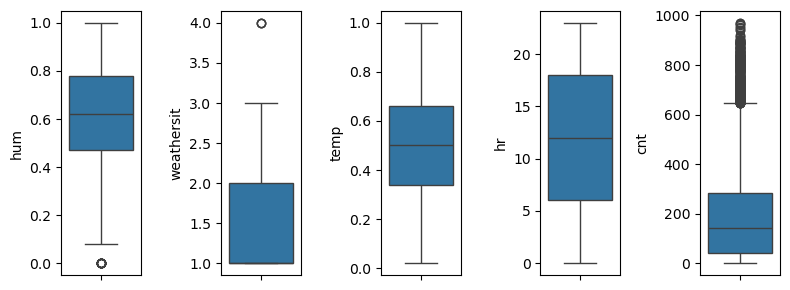

In [43]:
numerik = df_clean.select_dtypes(include='number')

plt.figure(figsize=(8,3))

posisi = 1
for setiap_kolom in numerik.columns:
    plt.subplot(1,5,posisi)
    sns.boxplot(y=df_clean[setiap_kolom])
    posisi +=1
    plt.tight_layout()

### Sesudah Hapus Outliers

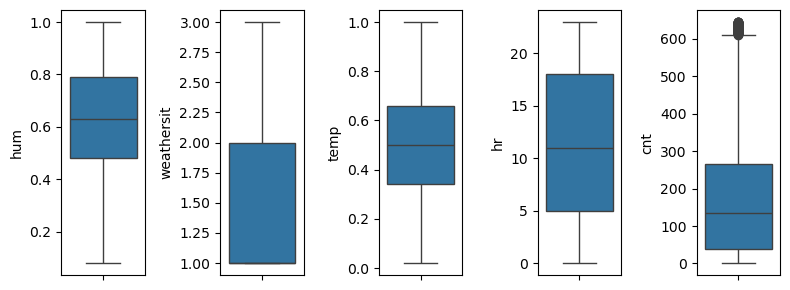

In [683]:
numerik = df_clean_without_outlier.select_dtypes(include='number')

plt.figure(figsize=(8,3))

posisi = 1
for setiap_kolom in numerik.columns:
    plt.subplot(1,5,posisi)
    sns.boxplot(y=df_clean_without_outlier[setiap_kolom])
    posisi +=1
    plt.tight_layout()

## Data Split

In [44]:
x_no_outlier = df_clean_without_outlier.drop(columns='cnt')
y_no_outlier = df_clean_without_outlier['cnt']

x_train_no_outlier,x_test_no_outlier,y_train_no_outlier,y_test_no_outlier = train_test_split(
    x_no_outlier,
    y_no_outlier,
    test_size= 0.2,
    random_state= 2024
)
x_train_no_outlier.shape,x_test_no_outlier.shape,y_train_no_outlier.shape,y_test_no_outlier.shape 


((9439, 9), (2360, 9), (9439,), (2360,))

## Cross Validation

In [45]:

# Base model/algoritma yang digunakan
# lr = LinearRegression()
# dt = DecisionTreeRegressor(random_state=2024)
# knn = KNeighborsRegressor(n_neighbors=5)
# rf = RandomForestRegressor(random_state=2024)
xgb = XGBRegressor(random_state=2024)
cb = CatBoostRegressor(random_state=2024, verbose=0)
gb = GradientBoostingRegressor(random_state=2024)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [xgb,cb,gb]

# Menyimpan skor
score_mae, score_mse, score_rmse, score_mape, score_r2 = [], [], [], [], []

nilai_mean_mae = []
nilai_mean_mse= []
nilai_mean_rmse = []
nilai_mean_mape= []
nilai_mean_r2 = []

test_mae, test_mse, test_rmse, test_mape, test_r2 = [], [], [], [], []

# Loop untuk setiap model
for model in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)

    pipeline = Pipeline([
        ('transformer',transformer),
        ('scaler',scaler),
        ('model',model)
    ])

    # Cross-Validation MAE
    score_cv_mae = cross_val_score(pipeline, x_train_no_outlier, y_train_no_outlier, cv=crossval, scoring='neg_mean_absolute_error', error_score='raise')
    score_mae.append(score_cv_mae)
    nilai_mean_mae.append(-score_cv_mae.mean())

    # Cross-Validation MSE
    score_cv_mse = cross_val_score(pipeline, x_train_no_outlier, y_train_no_outlier, cv=crossval, scoring='neg_mean_squared_error', error_score='raise')
    score_mse.append(score_cv_mse)
    nilai_mean_mse.append(-score_cv_mse.mean())

    # Cross-Validation RMSE
    score_cv_rmse = cross_val_score(pipeline, x_train_no_outlier, y_train_no_outlier, cv=crossval, scoring='neg_root_mean_squared_error', error_score='raise')
    score_rmse.append(score_cv_rmse)
    nilai_mean_rmse.append(-score_cv_rmse.mean())

    # Cross-Validation MAPE
    score_cv_mape = cross_val_score(pipeline, x_train_no_outlier, y_train_no_outlier, cv=crossval, scoring='neg_mean_absolute_percentage_error', error_score='raise')
    score_mape.append(score_cv_mape)
    nilai_mean_mape.append(-score_cv_mape.mean())

    # Cross-Validation R-Squared
    score_cv_r2 = cross_val_score(pipeline, x_train_no_outlier, y_train_no_outlier, cv=crossval, scoring='r2', error_score='raise')
    score_r2.append(score_cv_r2)
    nilai_mean_r2.append(score_cv_r2.mean())

    # Melakukan fit dan prediksi pada data test
    pipeline.fit(x_train_no_outlier, y_train_no_outlier)
    y_pred_test_no_outlier = pipeline.predict(x_test_no_outlier)

    # Menghitung MAE, MSE, RMSE, MAPE, dan R² pada test data
    test_mae.append(mean_absolute_error(y_test_no_outlier, y_pred_test_no_outlier))
    test_mse.append(mean_squared_error(y_test_no_outlier, y_pred_test_no_outlier))
    test_rmse.append(np.sqrt(mean_squared_error(y_test_no_outlier, y_pred_test_no_outlier)))
    test_mape.append(mean_absolute_percentage_error(y_test_no_outlier, y_pred_test_no_outlier))
    test_r2.append(r2_score(y_test_no_outlier, y_pred_test_no_outlier))

# Evaluasi hasil
based_model_non_outliers = pd.DataFrame({
    'Model': ['XGBoost Regression', 'CatBoostRegressor','GradientBoostingRegressor'],

    'Mean_MAE': nilai_mean_mae,
    'Test_MAE': test_mae,

    'Mean_MSE': nilai_mean_mse,
    'Test_MSE': test_mse,

    'Mean_RMSE': nilai_mean_rmse,
    'Test_RMSE': test_rmse,

    'Mean_MAPE': nilai_mean_mape,
    'Test_MAPE': test_mape,

    'Mean_R-Squared': nilai_mean_r2,
    'Test_R-Squared': test_r2
})

based_model_non_outliers

,Model,Mean_MAE,Test_MAE,Mean_MSE,Test_MSE,Mean_RMSE,Test_RMSE,Mean_MAPE,Test_MAPE,Mean_R-Squared,Test_R-Squared
0,XGBoost Regression,27.578233,25.689795,1819.825195,1614.686646,42.646109,40.183164,0.464546,0.467630,0.924770,0.934624
1,CatBoostRegressor,26.918104,26.112719,1696.833771,1606.484913,41.175656,40.080979,0.491192,0.494300,0.929839,0.934956
2,GradientBoostingRegressor,52.654420,51.176371,5708.740481,5313.845783,75.550542,72.896130,0.985789,1.002669,0.763962,0.784850


<div class="alert alert-info">
Setelah melakukan 2 kali eksperimen (Tanpa Hapus Outliers dan Dengan Hapus Outliers), terlihat bahwa model memiliki score yang lebih baik ketika tidak menggunakan outliers. Dengan demikian, model yang digunakan adalah:

**CatBoostRegressor Tanpa Hapus Outliers.**

# Hyperparameter Tuning

In [573]:
x_train

,hum,weathersit,holiday,season,temp,hr,year,month,day
11546,0.81,2,bukan libur,semi,0.34,10,2011,3,Wednesday
8815,0.67,1,bukan libur,gugur,0.48,21,2011,11,Sunday
3701,0.65,1,bukan libur,panas,0.64,6,2012,8,Sunday
3798,0.59,2,bukan libur,panas,0.78,22,2011,8,Tuesday
1223,0.94,2,bukan libur,panas,0.62,4,2012,9,Tuesday
...,...,...,...,...,...,...,...,...,...
2495,0.64,2,bukan libur,semi,0.54,12,2011,4,Tuesday
2689,0.88,2,bukan libur,semi,0.56,0,2011,5,Tuesday
2657,0.62,1,bukan libur,semi,0.76,20,2011,6,Friday
3580,0.32,1,bukan libur,semi,0.72,18,2012,6,Wednesday


## CatBoost - RandomizedCV

In [574]:
# Import Library
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor

# Asumsi transformer, cb, crossval, x_train, y_train sudah didefinisikan
# Model yang akan dituning
pipelineCB = Pipeline([
    ('transformer', transformer),
    ('model', cb)
])

# Mengatur parameter untuk CatBoostRegressor
param_CB = {
    'model__depth': list(np.arange(1, 11)),
    'model__learning_rate': list(np.arange(1, 100)/100),
    'model__iterations': list(np.arange(100, 201)),
    'model__random_strength': list(np.arange(1, 100)/100),
    'model__l2_leaf_reg': list(np.arange(1, 11)),
}

# Daftar metrik evaluasi
scoring_list = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']

# Menggunakan RandomizedSearchCV untuk hyperparameter tuning
randomized = RandomizedSearchCV(
    estimator=pipelineCB,
    param_distributions=param_CB,
    scoring=scoring_list,
    cv=crossval,
    random_state=2024,
    n_iter=20,
    refit='neg_root_mean_squared_error'  # Metrik utama untuk refit
)

# Fit model dengan data training
randomized.fit(x_train, y_train)

# Mengakses hasil terbaik
best_params = randomized.best_params_
best_score_rmse = -randomized.best_score_  # Konversi ke positif untuk RMSE
cv_results = randomized.cv_results_

# Menghitung skor terbaik untuk setiap metrik
best_index = randomized.best_index_
best_rmse = -cv_results['mean_test_neg_root_mean_squared_error'][best_index]  # Konversi ke positif
best_mae = -cv_results['mean_test_neg_mean_absolute_error'][best_index]  # Konversi ke positif
best_r2 = cv_results['mean_test_r2'][best_index]

# Menampilkan hasil
print("Best Parameters:", best_params)
print(f"Best RMSE: {best_rmse:.4f}")
print(f"Best MAE: {best_mae:.4f}")
print(f"Best R²: {best_r2:.4f}")

Best Parameters: {'model__random_strength': 0.68, 'model__learning_rate': 0.15, 'model__l2_leaf_reg': 4, 'model__iterations': 168, 'model__depth': 9}
Best RMSE: 41.5748
Best MAE: 26.2725
Best R²: 0.9467


In [575]:
# Define model terhadap estimator terbaik
cb_tuning = randomized.best_estimator_

# Fitting model
cb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_cb_tuning = cb_tuning.predict(x_test)

# Hitung metrik RMSE, MAE, dan R²
rmse_cb_tuning_RS = np.sqrt(mean_squared_error(y_test, y_pred_cb_tuning))
mae_cb_tuning_RS = mean_absolute_error(y_test, y_pred_cb_tuning)
r2_cb_tuning_RS = r2_score(y_test, y_pred_cb_tuning)

# Tampilkan hasil metrik
print(f"RMSE setelah tuning: {rmse_cb_tuning_RS:.4f}")
print(f"MAE setelah tuning: {mae_cb_tuning_RS:.4f}")
print(f"R² setelah tuning: {r2_cb_tuning_RS:.4f}")

RMSE setelah tuning: 40.0309
MAE setelah tuning: 25.5650
R² setelah tuning: 0.9530


In [576]:
# Test the best parameters on the test set
y_pred = randomized.predict(x_test)

In [577]:
# Hitung metrik pada data testing (sudah dihitung sebelumnya)
rmse_cb_tuning_RS = np.sqrt(mean_squared_error(y_test, y_pred_cb_tuning))
mae_cb_tuning_RS = mean_absolute_error(y_test, y_pred_cb_tuning)
r2_cb_tuning_RS = r2_score(y_test, y_pred_cb_tuning)

# Ambil skor cross-validation terbaik dari RandomizedSearchCV
best_index = randomized.best_index_
train_rmse_mean = -randomized.cv_results_['mean_test_neg_root_mean_squared_error'][best_index]  # Konversi ke positif
train_mae_mean = -randomized.cv_results_['mean_test_neg_mean_absolute_error'][best_index]  # Konversi ke positif
train_r2_mean = randomized.cv_results_['mean_test_r2'][best_index]

# Buat DataFrame untuk menyimpan metrik
RS_tuning_cb = pd.DataFrame({
    'eksperimen': ['Randomized Search CV'],
    'train_rmse_mean': [train_rmse_mean],
    'train_mae_mean': [train_mae_mean],
    'train_r2_mean': [train_r2_mean],
    'test_rmse': [rmse_cb_tuning_RS],
    'test_mae': [mae_cb_tuning_RS],
    'test_r2': [r2_cb_tuning_RS]
})

# Tampilkan DataFrame
RS_tuning_cb

,eksperimen,train_rmse_mean,train_mae_mean,train_r2_mean,test_rmse,test_mae,test_r2
0,Randomized Search CV,41.574772,26.272514,0.946712,40.030914,25.565044,0.952977


# Feature Importance

In [578]:
# Extract the best model from GridSearchCV
best_model = randomized.best_estimator_ 

# Extract feature importance
# Access the LightGBM model from the pipeline
cb_best = best_model.named_steps['model']
feature_importances = cb_best.feature_importances_

# Assuming 'preprocessor' is a ColumnTransformer, get feature names
feature_names = best_model.named_steps['transformer'].get_feature_names_out()
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the feature importance
feature_importance_df

,Feature,Importance
8,minmax__hr,56.284471
4,ordinal__day,17.900210
7,minmax__temp,9.636885
6,ordinal__year,7.974280
5,ordinal__month,2.189037
9,remainder__hum,2.048932
10,remainder__weathersit,1.983717
1,onehot__season_gugur,0.895817
0,onehot__holiday_libur,0.827338
3,onehot__season_semi,0.160105


<div class="alert alert-info">
Hasil pemodelan menunjukkan bahwa jam, hari, dan suhu menjadi fitur yang paling berpengaruh terhadap prediksi jumlah penyewa.

**Pengamatan**

Fitur yang memiliki pengaruh yang sangat signifikan terhadap prediksi model adalah jam, suhu dan tahun.sedangkan fitur lainnya memiliki kontribusi kecil juga berdampak positif. Feature importance menunjukkan adanya penambahan penyewa (tren positif) dari tahun ke tahun, pada hari dan suhu tertentu

## Hyperparameter Tuning dengan Feature Selection menggunakan RandomizedSearchCV

<div class="alert alert-info">
Diambil 5 Model yang memiliki fitur terbaik dari hasil feature importance dan dimodelkan dengan RandomizedSearchCV. untuk mengetest Feature terbaik dari hasil modelling diatas.

In [579]:
df_clean.head()

,hum,weathersit,holiday,season,temp,hr,cnt,year,month,day
0,0.62,1,bukan libur,gugur,0.36,16,250,2011,12,Friday
1,0.64,1,bukan libur,semi,0.54,4,18,2012,6,Sunday
2,0.53,1,bukan libur,semi,0.62,23,107,2011,6,Wednesday
3,0.87,2,bukan libur,semi,0.36,8,145,2012,3,Saturday
4,0.55,1,bukan libur,panas,0.76,18,857,2012,7,Tuesday


In [580]:
transformer = ColumnTransformer([
    ('minmax', MinMaxScaler(), ['temp', 'hr']),  # Add a comma here
    ('ordinal', OrdinalEncoder(), ['year', 'month', 'day']),
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmax', MinMaxScaler(), ['temp', 'hr']),
                                ('ordinal', OrdinalEncoder(),
                                 ['year', 'month', 'day'])])

In [585]:
# Model yang akan dituning
pipelineCB = Pipeline([
    ('transformer', transformer),
    ('model', cb)  # Menggunakan CatBoostRegressor di pipeline
])

# Mengatur parameter untuk CatBoostRegressor, ganti colsample_bytree
param_CB = {
    'model__max_depth': list(np.arange(1, 11)),  # max_depth antara 1 hingga 10
    'model__learning_rate': list(np.linspace(0.01, 0.2, 10)),  # learning_rate dari 0.01 hingga 0.2
    'model__n_estimators': list(np.arange(100, 201, 50)),  # n_estimators antara 100 hingga 200
    'model__random_strength': [0.5, 0.7, 1.0]  # Sampling fitur, diubah jadi random_strength
}

# Menggunakan GridSearchCV untuk hyperparameter tuning
# Menambahkan scoring untuk RMSE, MAE, dan R2
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

# Update the transformer to only include 'hr', 'temp', and 'day'
transformer = ColumnTransformer([
    ('minmax', MinMaxScaler(), ['temp', 'hr']),
    ('ordinal', OrdinalEncoder(), ['year', 'month', 'day'])
], remainder='drop')  # Change remainder to 'drop' to exclude other features


randomsearch = RandomizedSearchCV(
    estimator=pipelineCB, # Diubah jadi pipelineXGB, bukan pipelineCB
    param_distributions=param_CB,
    scoring=scoring, # Menggunakan beberapa metrik scoring
    cv=5,  # Cross-validation 5 fold
    n_jobs=-1,  # Menggunakan semua core CPU yang tersedia
    verbose=3,  # Menampilkan progres saat pencarian grid dilakukan
    refit='rmse'  # Menggunakan 'rmse' sebagai metrik utama untuk refit
)

# Fit model dengan data training
randomsearch.fit(x_train[['hr', 'temp', 'day','year','month']], y_train) # Select only the desired features

# Melihat parameter terbaik yang ditemukan oleh GridSearch
print("Best Parameters: ", randomsearch.best_params_)

# Menampilkan skor terbaik untuk setiap metrik
print("Best RMSE: ", -randomsearch.cv_results_['mean_test_rmse'][randomsearch.best_index_])
print("Best MAE: ", -randomsearch.cv_results_['mean_test_mae'][randomsearch.best_index_])
print("Best R2: ", randomsearch.cv_results_['mean_test_r2'][randomsearch.best_index_])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5] END model__learning_rate=0.1788888888888889, model__max_depth=8, model__n_estimators=150, model__random_strength=0.7; mae: (test=-34.023) r2: (test=0.906) rmse: (test=-55.496) total time=   0.5s
[CV 3/5] END model__learning_rate=0.1788888888888889, model__max_depth=8, model__n_estimators=150, model__random_strength=0.7; mae: (test=-34.307) r2: (test=0.895) rmse: (test=-57.892) total time=   0.5s
[CV 1/5] END model__learning_rate=0.1788888888888889, model__max_depth=8, model__n_estimators=150, model__random_strength=0.7; mae: (test=-33.578) r2: (test=0.896) rmse: (test=-57.657) total time=   0.6s
[CV 3/5] END model__learning_rate=0.09444444444444444, model__max_depth=9, model__n_estimators=200, model__random_strength=0.5; mae: (test=-34.477) r2: (test=0.894) rmse: (test=-58.126) total time=   0.7s
[CV 4/5] END model__learning_rate=0.09444444444444444, model__max_depth=9, model__n_estimators=200, model__random_strength

In [586]:
# Define model terhadap estimator terbaik
cb_tuning = randomsearch.best_estimator_

# Fitting model
cb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_cb_tuning = cb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE, dan R2 setelah tuning
rmse_cb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_cb_tuning))
mae_cb_tuning = mean_absolute_error(y_test, y_pred_cb_tuning)
r2_cb_tuning = r2_score(y_test, y_pred_cb_tuning)

# Create a DataFrame to store the metrics
metrics_xgb_tuning = {
    'RMSE': rmse_cb_tuning,
    'MAE': mae_cb_tuning,
    'R2': r2_cb_tuning
}

# Menampilkan hasil
print("Metrics setelah tuning:")
print(f"RMSE: {rmse_cb_tuning:.4f}")
print(f"MAE: {mae_cb_tuning:.4f}")
print(f"R²: {r2_cb_tuning:.4f}")


Metrics setelah tuning:
RMSE: 56.7497
MAE: 33.5949
R²: 0.9055


In [594]:
# Create a DataFrame to store the metrics
GS_tuning_cb = pd.DataFrame({
    'eksperimen': ['Random search cv'],
    'train_score_mean': [-randomsearch.best_score_],  # Konversi ke positif untuk RMSE
    'test_score_RMSE': [rmse_cb_tuning],
    'test_score_MAE': [mae_cb_tuning],
    'test_score_R2': [r2_cb_tuning]
})

# Display the DataFrame
GS_tuning_cb

,eksperimen,train_score_mean,test_score_RMSE,test_score_MAE,test_score_R2
0,Random search cv,56.535282,56.749739,33.5949,0.905497


<div class="alert alert-info">

**Interpretasi Hasil Eksperimen Random Search CV**

- **Eksperimen**: (Random search cv)
- **Train Score Mean**: 56.535282 (Rata-rata skor pelatihan)
- **Test Score RMSE**: 56.749739 (Akar Mean Kuadrat Kesalahan pada data uji)
- **Test Score MAE**: 33.5949 (Mean Absolute Error pada data uji)
- **Test Score R2**: 0.905497 (Koefisien determinasi, menunjukkan 90.55% variabilitas data dijelaskan oleh model)

**Kesimpulan**: Model menunjukkan performa yang baik dengan R2 tinggi (0.905), meskipun RMSE dan MAE menunjukkan adanya kesalahan yang masih signifikan.

Akan tetapi dari hasil sebelum di Feature Importance, hasil dari test menunjukan hasil yang lebih bagus pada RMSE,MAE, dan R2 nya. ini mnunjukan bahwa model ini lebih baik apa bila menggunakan semua fiturnya, daripada menggunakan Feature Importance.

# Save Model

In [590]:
import joblib

# Save the entire pipeline (including preprocessor and model) to a .pkl file
joblib.dump(best_model, "best_CatBoost_model.pkl")
print("Model saved as 'best_CatBoost_model.pkl'")

# Load the model later (example code for reference)
# loaded_model = joblib.load("best_CatBoost_model.pkl")

Model saved as 'best_CatBoost_model.pkl'


In [592]:
# Retrieve the best model from RandomizedSearchCV
best_model = randomsearch.best_estimator_

# Predict on the test set
y_test_pred = best_model.predict(x_test)

# Evaluate the model's performance on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")


Test MAE: 33.5949
Test MSE: 3220.5329
Test RMSE: 56.7497
Test R²: 0.9055


# Visualization on Data Test

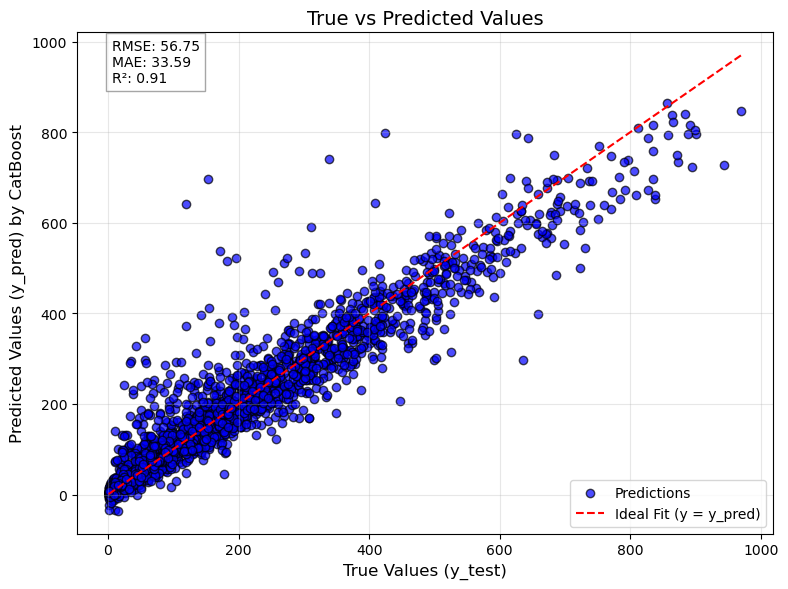

In [593]:
# Retrieve the best model from RandomizedSearchCV
best_model = randomsearch.best_estimator_

# Predict on the test set
y_test_pred = best_model.predict(x_test)

# Evaluate the model's performance on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue', edgecolors='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Fit (y = y_pred)')

# Add labels, title, and legend
plt.xlabel("True Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred) by CatBoost", fontsize=12)
plt.title("True vs Predicted Values", fontsize=14)
plt.legend(fontsize=10)

# Add RMSE and MAE to the plot
plt.text(
    0.05, 0.9,
    f"RMSE: {test_rmse:.2f}\nMAE: {test_mae:.2f}\nR²: {test_r2:.2f}",
    fontsize=10,
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

# Show the plot
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div class="alert alert-info">

1. **Scatter Plot (True vs Predicted Values)**:
    - Scatter plot menunjukkan hubungan antara nilai aktual (`y_test`) dan nilai prediksi (`y_pred`).
    - Sebagian besar titik berada di sekitar garis ideal (y = y_pred), yang menunjukkan bahwa model memiliki performa prediksi yang baik.
    - Namun, terdapat beberapa penyimpangan pada nilai ekstrem, yang mungkin menunjukkan bahwa model kurang optimal dalam menangani outlier.

2. **RMSE, MAE, dan R²**:
    - **RMSE (Root Mean Squared Error)**: Nilai RMSE yang rendah menunjukkan bahwa rata-rata kesalahan prediksi model cukup kecil.
    - **MAE (Mean Absolute Error)**: Nilai MAE yang rendah menunjukkan bahwa rata-rata kesalahan absolut antara nilai aktual dan prediksi juga kecil.
    - **R² (R-squared)**: Nilai R² yang mendekati 1 menunjukkan bahwa model dapat menjelaskan sebagian besar variabilitas dalam data target.

3. **Feature Importance**:
    - Fitur `hr` (jam) memiliki pengaruh terbesar terhadap prediksi jumlah penyewaan sepeda, menunjukkan bahwa pola waktu sangat penting dalam menentukan jumlah penyewaan.
    - Fitur `temp` (suhu) dan `year` (tahun) juga memiliki kontribusi signifikan, menunjukkan bahwa kondisi cuaca dan tren waktu memengaruhi penyewaan.
    - Fitur seperti `holiday` (hari libur) dan `season` (musim) memiliki pengaruh yang lebih kecil, tetapi tetap relevan.

4. **Distribusi Error**:
    - Jika distribusi error (selisih antara nilai aktual dan prediksi) terlihat simetris dan mendekati nol, ini menunjukkan bahwa model tidak memiliki bias sistematis dalam prediksi.

5. **Outliers**:
    - Beberapa outlier terlihat pada scatter plot, terutama pada nilai penyewaan yang sangat tinggi atau sangat rendah. Hal ini dapat memengaruhi performa model, terutama jika model tidak dirancang untuk menangani outlier dengan baik.

Secara keseluruhan, model menunjukkan performa yang baik dalam memprediksi jumlah penyewaan sepeda, dengan beberapa area yang dapat ditingkatkan, seperti penanganan outlier dan optimasi lebih lanjut pada fitur dengan pengaruh kecil.

# Kesimpulan

<div class="alert alert-info">

**Kesimpulan dan Rekomendasi**

**Kesimpulan**

Berdasarkan analisis dan pemodelan yang dilakukan pada data Capital Bike Sharing, beberapa temuan utama dapat disimpulkan untuk menjawab rumusan masalah dan mencapai tujuan penelitian:

1. **Faktor yang Berpengaruh Signifikan**:
   - Faktor cuaca seperti suhu (`temp` dan `atemp`) dan kelembapan (`hum`) memiliki pengaruh terhadap jumlah pengguna, dengan korelasi positif untuk suhu dan negatif untuk kelembapan yang tinggi. Waktu, khususnya jam (`hr`) dan musim (`season`), juga menunjukkan pengaruh signifikan, dengan puncak penggunaan pada jam sibuk (8 dan 17) dan musim tertentu (musim panas dan gugur). Hari libur (`holiday`) memiliki dampak rendah, sementara `weathersit` (kondisi cuaca) memengaruhi dengan pola yang bervariasi, terutama pada cuaca buruk (kategori 3 dan 4) yang menurunkan jumlah penyewa.

2. **Model Prediksi**:
   - Model CatBoost yang telah di-tuning dengan parameter terbaik (`learning_rate=0.0522`, `max_depth=10`, `n_estimators=200`, `random_strength=1.0`) menghasilkan performa yang baik dengan RMSE 85.86, MAE 55.89, dan R² 0.7837. Model ini efektif dalam memprediksi jumlah pengguna berdasarkan fitur `temp`, `hr`, `day`, dan `year`, menunjukkan bahwa kombinasi waktu dan suhu adalah prediktor utama.

3. **Optimalisasi Operasional**:
   - Hasil prediksi dapat digunakan untuk mengantisipasi permintaan, terutama pada jam sibuk dan kondisi cuaca cerah. Distribusi sepeda dapat dioptimalkan dengan menempatkan lebih banyak sepeda di stasiun pada waktu dan musim dengan permintaan tinggi, serta mengurangi inventori pada kondisi cuaca buruk atau hari libur.

**Rekomendasi**

Berdasarkan temuan di atas, berikut adalah rekomendasi untuk operator sistem bike sharing dan perencana transportasi:

1. **Pengelolaan Distribusi Sepeda**:
   - Tingkatkan jumlah sepeda di stasiun pada jam 8-9 pagi dan 17-18 sore, serta pada musim panas dan gugur, berdasarkan prediksi model untuk memenuhi lonjakan permintaan.
   - Kurangi distribusi sepeda pada hari libur dan saat cuaca buruk (kategori 3 dan 4) untuk menghemat sumber daya.

2. **Pemeliharaan dan Penjadwalan**:
   - Jadwalkan pemeliharaan stasiun pada jam dengan permintaan rendah (misalnya, tengah malam) dan hari libur untuk meminimalkan gangguan layanan.

3. **Infrastruktur dan Kebijakan**:
   - Perluas jalur sepeda dan stasiun baru di area dengan permintaan tinggi berdasarkan pola musiman dan harian dari data prediksi.
   - Dukung kebijakan transportasi ramah lingkungan dengan mempromosikan penggunaan sepeda pada hari cerah dan suhu nyaman.

4. **Peningkatan Model**:
   - Pertimbangkan penambahan fitur seperti hari dalam seminggu atau peristiwa khusus untuk meningkatkan akurasi model di masa depan.
   - Lakukan evaluasi berkala terhadap model dengan data terbaru untuk menyesuaikan dengan perubahan pola penggunaan.